# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

!pip3 install fancyimpute category_encoders

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=66468bf7894b953e60ba5d77e1e8eb26f4cfbf84da76fb20b610fb31d2bbd3b6
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=63a38a159aee01146ded04cb8bfe2ecdcf7ce05044070ed197a4fd74ff42b5af
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
!ls

gdrive	sample_data


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
from sklearn import preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import math
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# Read Dataset

In [ ]:
path_to_csv = "/content/gdrive/MyDrive/CPSC-5305-Project/Data/Indicators of Heart Disease.csv"
health_df = pd.read_csv(path_to_csv)
health_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Additional Details for Health DS (DataSet)

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [ ]:
health_df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


## Getting Unique and Count of null values

In [ ]:
def get_unique_null_values(data):
  for col in data.columns:
    print("Columns: ", col)
    print("Unique Values: ",data[col].unique())
    # print("Count of Unique vals: ",data[col].unique().remove(np.nan).sum())
    print("Missing Values: ",data[col].isnull().sum())
    print("-------------------------------------------------------------------------")

In [ ]:
get_unique_null_values(health_df)

Columns:  State
Unique Values:  ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Missing Values:  0
-------------------------------------------------------------------------
Columns:  Sex
Unique Values:  ['Female' 'Male']
Missing Values:  0
-------------------------------------------------------------------------
Columns:  GeneralHealth
Unique Values:  ['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]

## Count of Unique values in Categorical data

In [ ]:
for col in health_df.columns:
  if health_df[col].dtype == "object":
    print("Columns: ", col)
    print("Unique Values: ",health_df[col].value_counts())
    print("-------------------------------------------------------------------------")

Columns:  State
Unique Values:  Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Alaska  

In [ ]:
health_df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

## Visualize Missing Data

<Axes: >

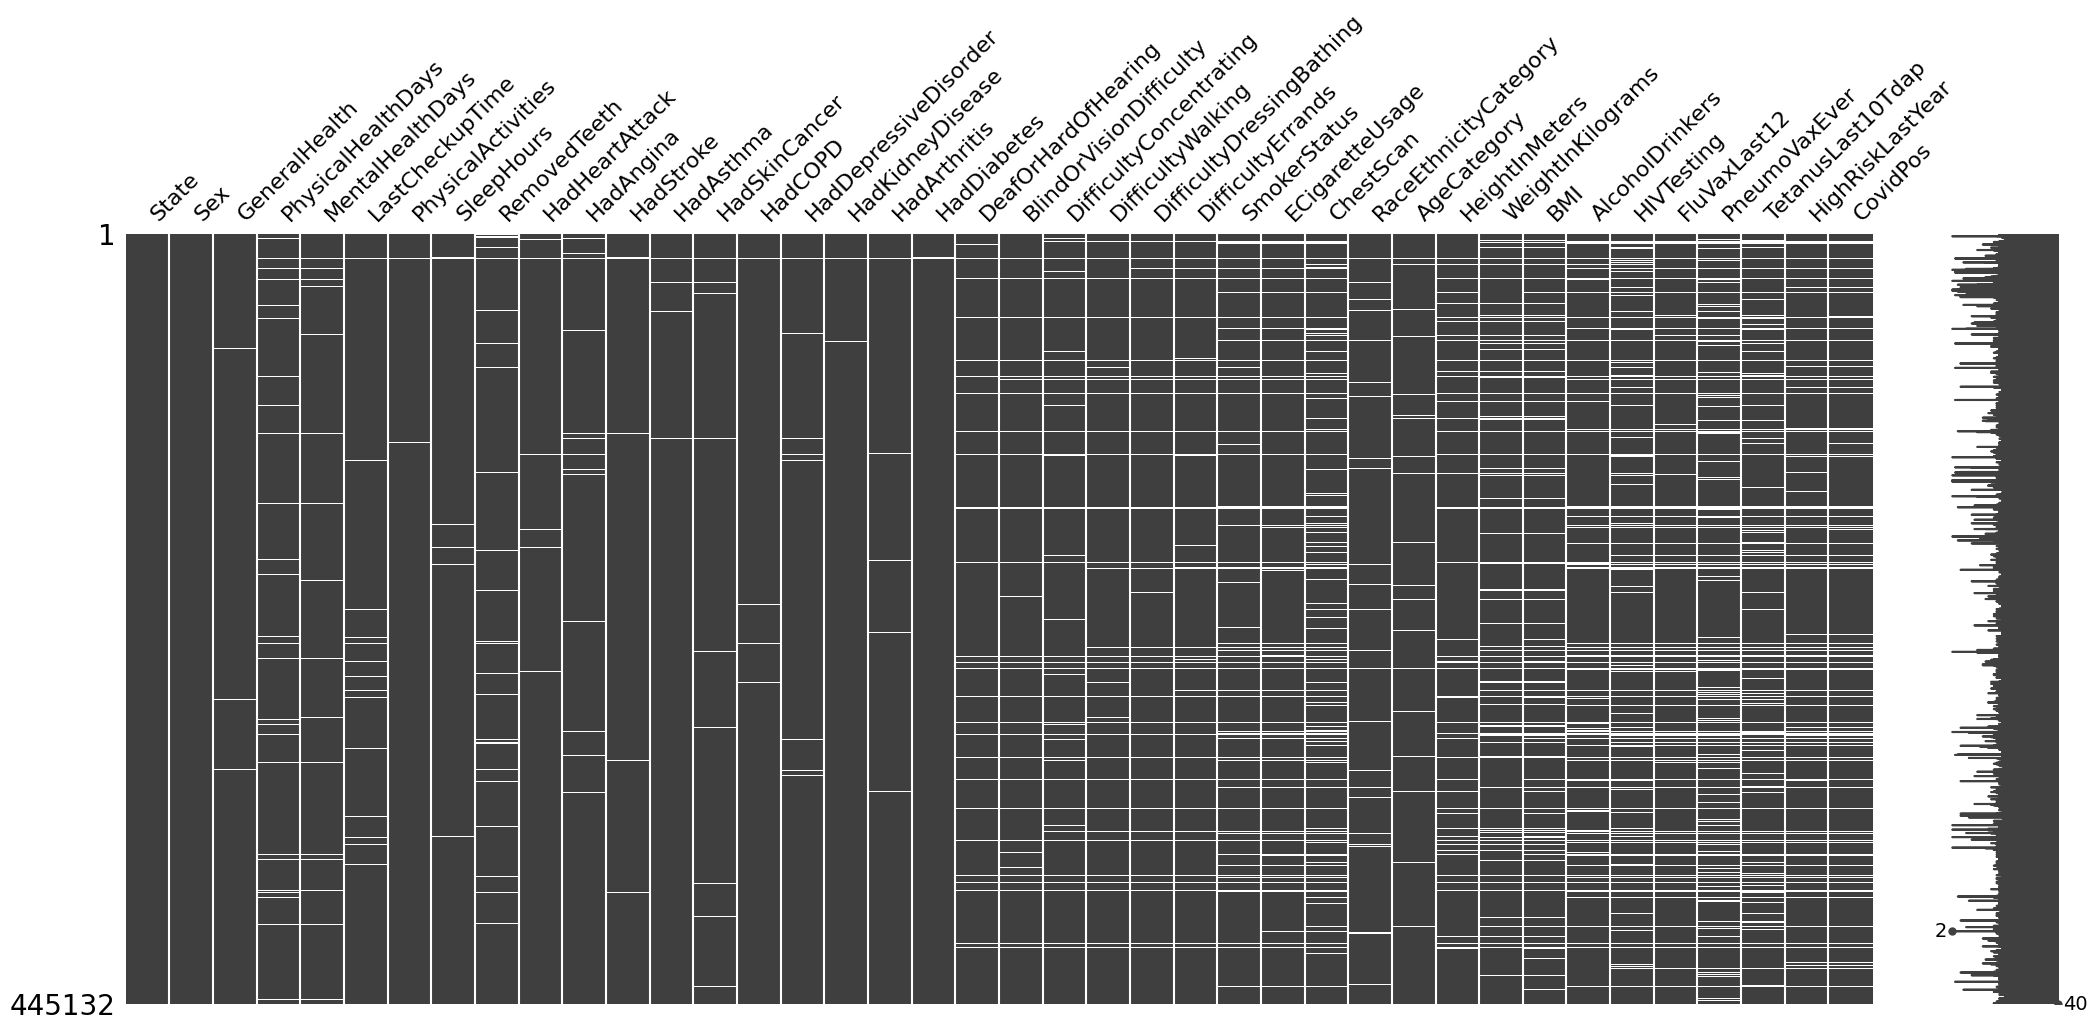

In [ ]:
msno.matrix(health_df)

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:271: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

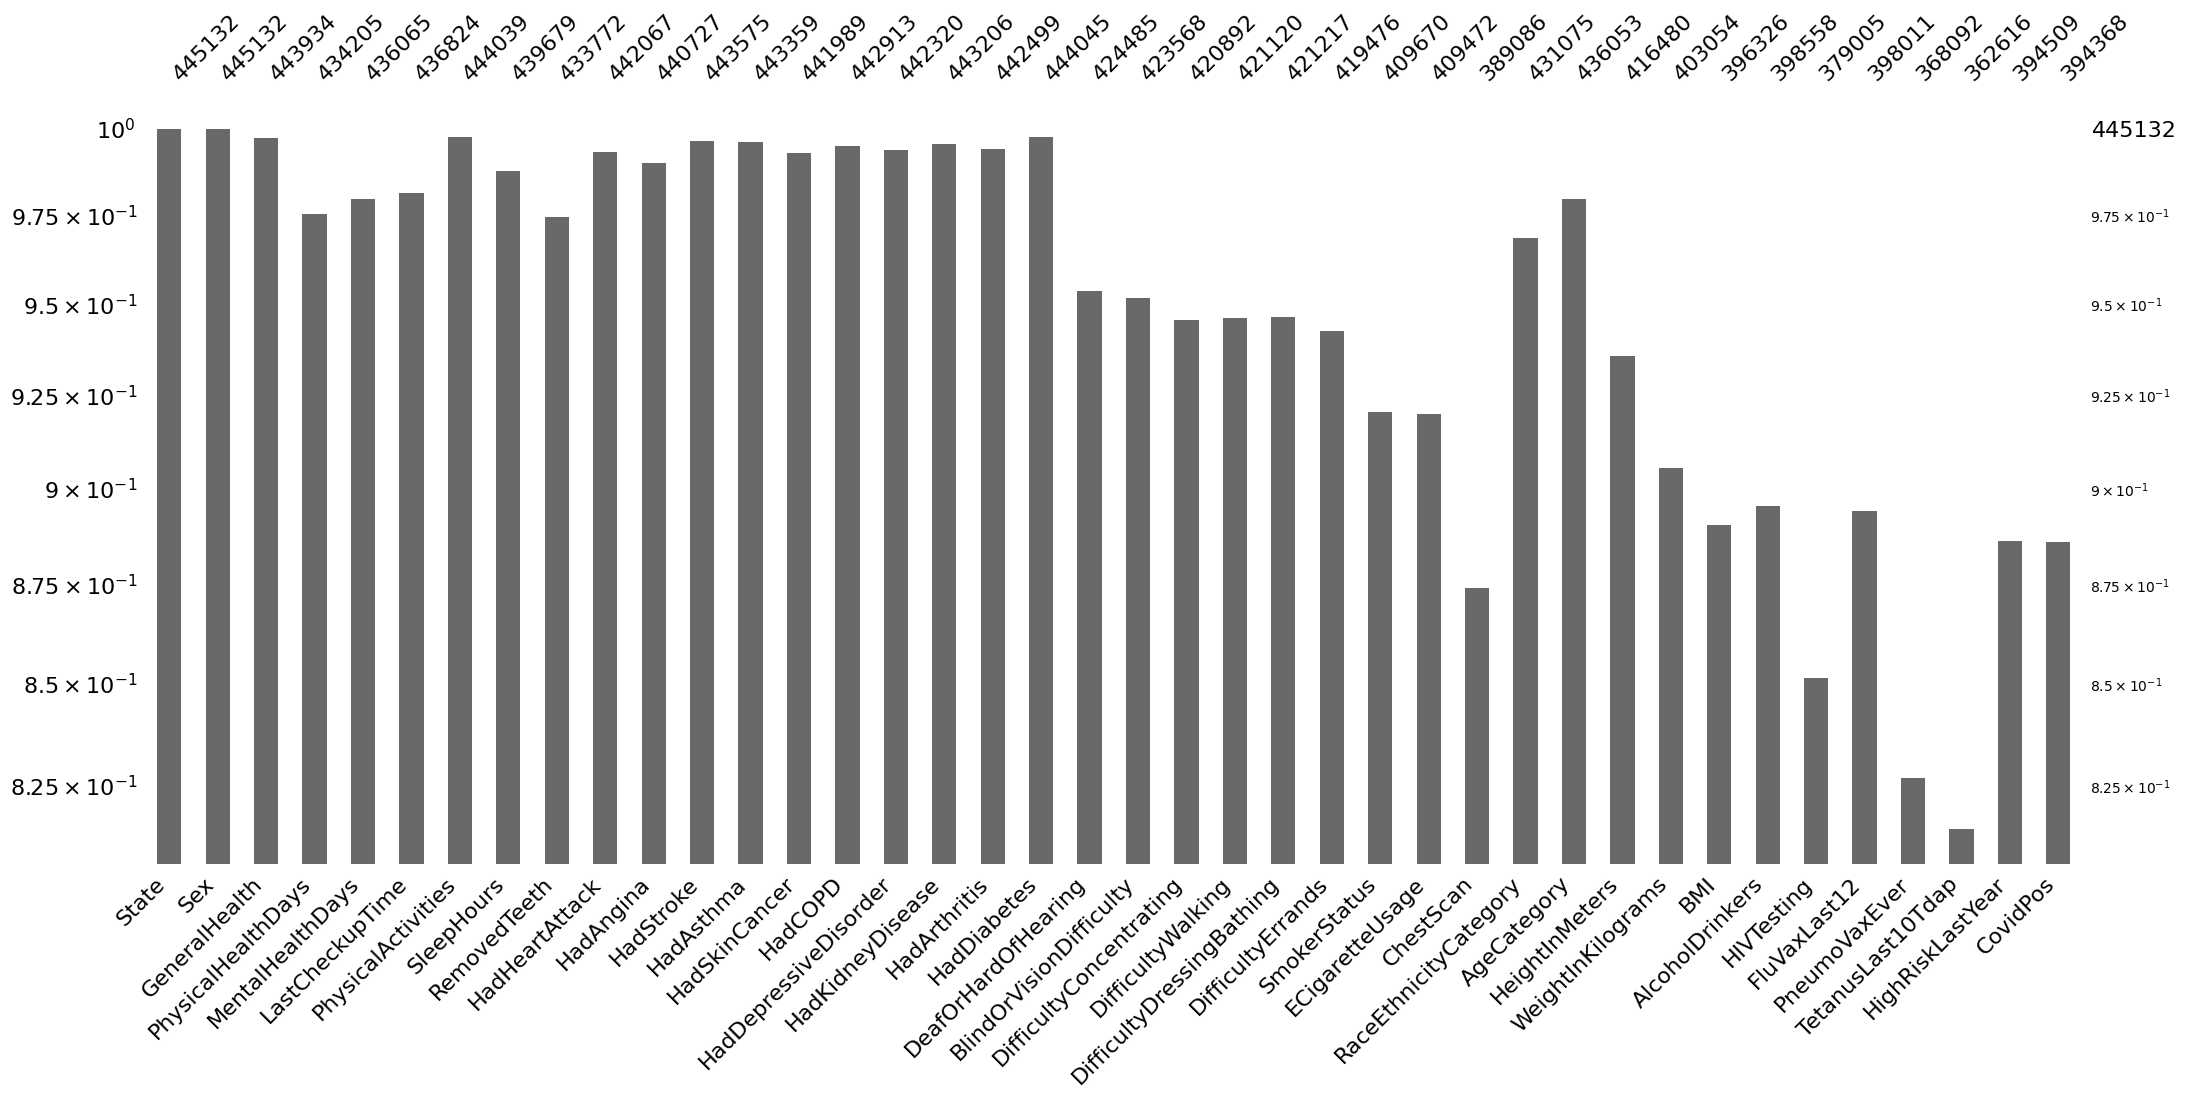

In [ ]:
msno.bar(health_df, log=True)

<Axes: >

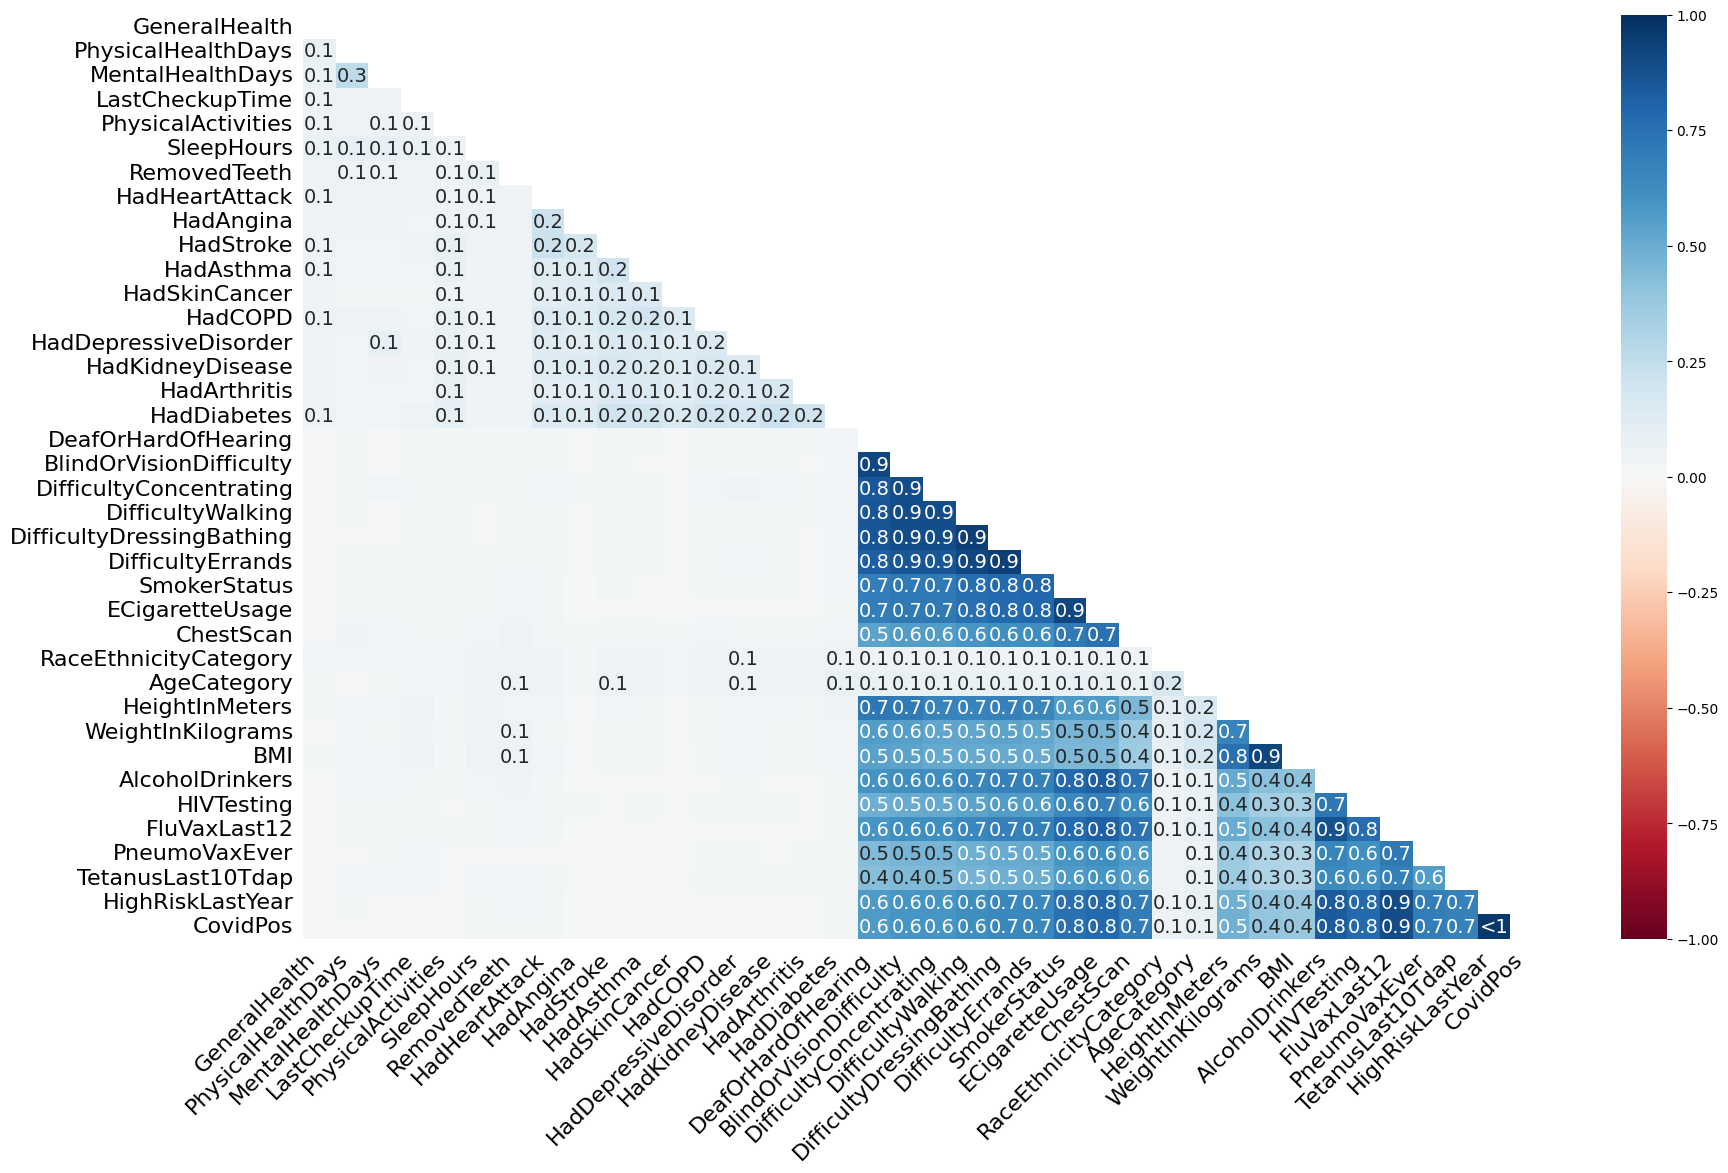

In [ ]:
msno.heatmap(health_df)

# Data Cleaning

## Removed Duplicates

In [ ]:
health_df_drop_dup = health_df.drop_duplicates()
health_df_drop_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              44

## Remove null field values for our Label Column

In [ ]:
health_df_filtered = health_df_drop_dup.dropna(subset=['HadHeartAttack'])

In [ ]:
print(health_df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441915 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      441915 non-null  object 
 1   Sex                        441915 non-null  object 
 2   GeneralHealth              440820 non-null  object 
 3   PhysicalHealthDays         431318 non-null  float64
 4   MentalHealthDays           433123 non-null  float64
 5   LastCheckupTime            433876 non-null  object 
 6   PhysicalActivities         440943 non-null  object 
 7   SleepHours                 436719 non-null  float64
 8   RemovedTeeth               430905 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  438327 non-null  object 
 11  HadStroke                  440845 non-null  object 
 12  HadAsthma                  440478 non-null  object 
 13  HadSkinCancer              43

## Taking Necessary Columns

In [ ]:
final_df = health_df_filtered[['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours',  'HadHeartAttack', 'HadAngina','HadStroke', 'HadAsthma',
        'HadCOPD','HadDepressiveDisorder',
       'HadDiabetes','DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus','ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers','CovidPos']]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441915 entries, 0 to 445131
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   State                    441915 non-null  object 
 1   Sex                      441915 non-null  object 
 2   GeneralHealth            440820 non-null  object 
 3   PhysicalHealthDays       431318 non-null  float64
 4   MentalHealthDays         433123 non-null  float64
 5   LastCheckupTime          433876 non-null  object 
 6   PhysicalActivities       440943 non-null  object 
 7   SleepHours               436719 non-null  float64
 8   HadHeartAttack           441915 non-null  object 
 9   HadAngina                438327 non-null  object 
 10  HadStroke                440845 non-null  object 
 11  HadAsthma                440478 non-null  object 
 12  HadCOPD                  440077 non-null  object 
 13  HadDepressiveDisorder    439494 non-null  object 
 14  HadD

## Observing the count for every unique value and null values

In [ ]:
for col in final_df.columns:
  if final_df[col].dtype == "object":
    print("Columns: ", col)
    print("Unique Values: ",final_df[col].value_counts())
    print("Missing Values: ",final_df[col].isnull().sum())
    print("-------------------------------------------------------------------------")

Columns:  State
Unique Values:  Washington              25987
New York                17615
Minnesota               16733
Ohio                    16389
Maryland                16291
Texas                   14121
Florida                 13274
Wisconsin               11207
Kansas                  11175
Massachusetts           10956
California              10850
Maine                   10584
Indiana                 10371
Virginia                10350
Arizona                 10088
South Carolina           9964
Michigan                 9954
Utah                     9770
Connecticut              9689
Colorado                 9306
Georgia                  9161
Iowa                     8881
Vermont                  8756
New Jersey               8141
Hawaii                   7705
Nebraska                 7427
Missouri                 7382
South Dakota             7377
Montana                  7010
New Hampshire            6703
Idaho                    6247
Rhode Island             5845
Alaska  

# Converting Object to Numerical Data



In [ ]:
onehotencoder = preprocessing.OneHotEncoder(sparse=False,handle_unknown='ignore')
le = preprocessing.LabelEncoder()

## Converting Ordinal Data

In [ ]:
# Sex = {"Male":0, "Female":1}
GeneralHealthOrder = {"Very good": 4, "Excellent":3,"Good":2,  "Fair":1,"Poor":0}
YesNoOrder= {"Yes":1, "No":0}
LastCheckupTimeOrder = {"Within past year (anytime less than 12 months ago)":3, "Within past 2 years (1 year but less than 2 years ago)": 2,
                  "Within past 5 years (2 years but less than 5 years ago)":1, "5 or more years ago":0 }
SmokerStatusOrder = {"Current smoker - now smokes every day": 0, "Current smoker - now smokes some days":1, "Former smoker":2, "Never smoked":3 }
ECigsUsageOrder = {"Use them every day":0,"Use them some days":1, "Not at all (right now)":2,"Never used e-cigarettes in my entire life": 3}
# AgeCategoryOrder = {}

OrdinalColumnsToReplace = {
    'GeneralHealth':GeneralHealthOrder,
    'LastCheckupTime':LastCheckupTimeOrder,
    "SmokerStatus":SmokerStatusOrder,
    "ECigaretteUsage":ECigsUsageOrder,
    "HadHeartAttack": YesNoOrder,'PhysicalActivities': YesNoOrder,
    'HadAngina': YesNoOrder, 'HadStroke': YesNoOrder,
    'HadAsthma': YesNoOrder, 'HadCOPD': YesNoOrder,
    'HadDepressiveDisorder': YesNoOrder,
     'DifficultyConcentrating': YesNoOrder,
    'DifficultyWalking': YesNoOrder, 'ChestScan': YesNoOrder,
    'AlcoholDrinkers': YesNoOrder
}

In [ ]:
categorical_converted_df = final_df.replace(OrdinalColumnsToReplace)

In [ ]:
final_df.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,No,No,...,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,...,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,No,No,...,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,Yes,No,...,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,No,No,...,Former smoker,Not at all (right now),Yes,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,Yes,No


In [ ]:
categorical_converted_df.tail()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
445127,Virgin Islands,Female,2.0,0.0,3.0,2.0,1.0,6.0,0,0.0,...,3.0,3.0,1.0,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes
445128,Virgin Islands,Female,3.0,2.0,2.0,3.0,1.0,7.0,0,0.0,...,3.0,3.0,0.0,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,0.0,No
445129,Virgin Islands,Female,0.0,30.0,30.0,0.0,0.0,5.0,0,0.0,...,0.0,1.0,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No
445130,Virgin Islands,Male,4.0,0.0,0.0,3.0,0.0,5.0,1,0.0,...,3.0,3.0,1.0,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,0.0,Yes
445131,Virgin Islands,Male,4.0,0.0,1.0,NaN,1.0,5.0,0,0.0,...,2.0,2.0,1.0,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,1.0,No


## O.H.E. for Cardinal Data

Use OHE Encoder for :
 'Sex','PhysicalActivities',
        'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadCOPD', 'HadDepressiveDisorder', 'HadDiabetes',
       'DifficultyConcentrating', 'DifficultyWalking', 'ChestScan', 'RaceEthnicityCategory',
        'AlcoholDrinkers',
       'CovidPos'


In [ ]:
ohe_converted_df = categorical_converted_df.copy(deep=True)
cardinal_columns = ['Sex', 'RaceEthnicityCategory','HadDiabetes','CovidPos']
ohe_converted_df[onehotencoder.get_feature_names_out()] = onehotencoder.fit_transform(categorical_converted_df[cardinal_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
ohe_converted_final_df = ohe_converted_df.drop(["Sex", "RaceEthnicityCategory","RaceEthnicityCategory_nan",'HadDiabetes','HadDiabetes_nan','CovidPos','CovidPos_nan'], axis=1)
ohe_converted_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441915 entries, 0 to 445131
Data columns (total 37 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   State                                                                   441915 non-null  object 
 1   GeneralHealth                                                           440820 non-null  float64
 2   PhysicalHealthDays                                                      431318 non-null  float64
 3   MentalHealthDays                                                        433123 non-null  float64
 4   LastCheckupTime                                                         433876 non-null  float64
 5   PhysicalActivities                                                      440943 non-null  float64
 6   SleepHours                                                          

In [ ]:
ohe_converted_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441915 entries, 0 to 445131
Data columns (total 37 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   State                                                                   441915 non-null  object 
 1   GeneralHealth                                                           440820 non-null  float64
 2   PhysicalHealthDays                                                      431318 non-null  float64
 3   MentalHealthDays                                                        433123 non-null  float64
 4   LastCheckupTime                                                         433876 non-null  float64
 5   PhysicalActivities                                                      440943 non-null  float64
 6   SleepHours                                                          

## Some Graphs

In [ ]:
final_df = ohe_converted_final_df.copy(deep=True)

In [ ]:
final_df2 = final_df.dropna(subset=["ChestScan"])

In [ ]:
final_df2.HadHeartAttack.value_counts()

0    364863
1     21905
Name: HadHeartAttack, dtype: int64

In [ ]:
final_df2.shape

(386768, 37)

## Create a df containing values for which "ChestScan" is not null and the label value is 0 (No). We chose "ChestScan" column as it had maximum missing values.

In [ ]:
df_not_null_no = final_df[(final_df['HadHeartAttack']==0) & (~final_df["ChestScan"].isnull())]

## Create a df containing values for which the label value is 1(Yes)

In [ ]:
df_yes = final_df[(final_df['HadHeartAttack']==1)]

In [ ]:
df_yes.HadHeartAttack.value_counts()

1    25108
Name: HadHeartAttack, dtype: int64

## Count missing values for df_yes

In [ ]:
for cols in df_yes.columns:
  print(cols)
  print("MISSING VALUES: ", df_yes[cols].isnull().sum())
  print('---------------------------------------------------------------------------------')


State
MISSING VALUES:  0
---------------------------------------------------------------------------------
GeneralHealth
MISSING VALUES:  113
---------------------------------------------------------------------------------
PhysicalHealthDays
MISSING VALUES:  962
---------------------------------------------------------------------------------
MentalHealthDays
MISSING VALUES:  703
---------------------------------------------------------------------------------
LastCheckupTime
MISSING VALUES:  329
---------------------------------------------------------------------------------
PhysicalActivities
MISSING VALUES:  91
---------------------------------------------------------------------------------
SleepHours
MISSING VALUES:  517
---------------------------------------------------------------------------------
HadHeartAttack
MISSING VALUES:  0
---------------------------------------------------------------------------------
HadAngina
MISSING VALUES:  1229
--------------------------------

## Count missing values for df_not_null_no

In [ ]:
for cols in df_not_null_no.columns:
  print(cols)
  print("MISSING VALUES: ", df_not_null_no[cols].isnull().sum())
  print('---------------------------------------------------------------------------------')


State
MISSING VALUES:  0
---------------------------------------------------------------------------------
GeneralHealth
MISSING VALUES:  781
---------------------------------------------------------------------------------
PhysicalHealthDays
MISSING VALUES:  7657
---------------------------------------------------------------------------------
MentalHealthDays
MISSING VALUES:  6515
---------------------------------------------------------------------------------
LastCheckupTime
MISSING VALUES:  6299
---------------------------------------------------------------------------------
PhysicalActivities
MISSING VALUES:  672
---------------------------------------------------------------------------------
SleepHours
MISSING VALUES:  3654
---------------------------------------------------------------------------------
HadHeartAttack
MISSING VALUES:  0
---------------------------------------------------------------------------------
HadAngina
MISSING VALUES:  1925
---------------------------

In [ ]:
df_not_null_no.shape

(364863, 37)

## Dropped null values for

In [ ]:
df_not_null_no = df_not_null_no.dropna()

In [ ]:
df_yes.shape

(25108, 37)

## Missingness matrix for df_not_null_no




<Axes: >

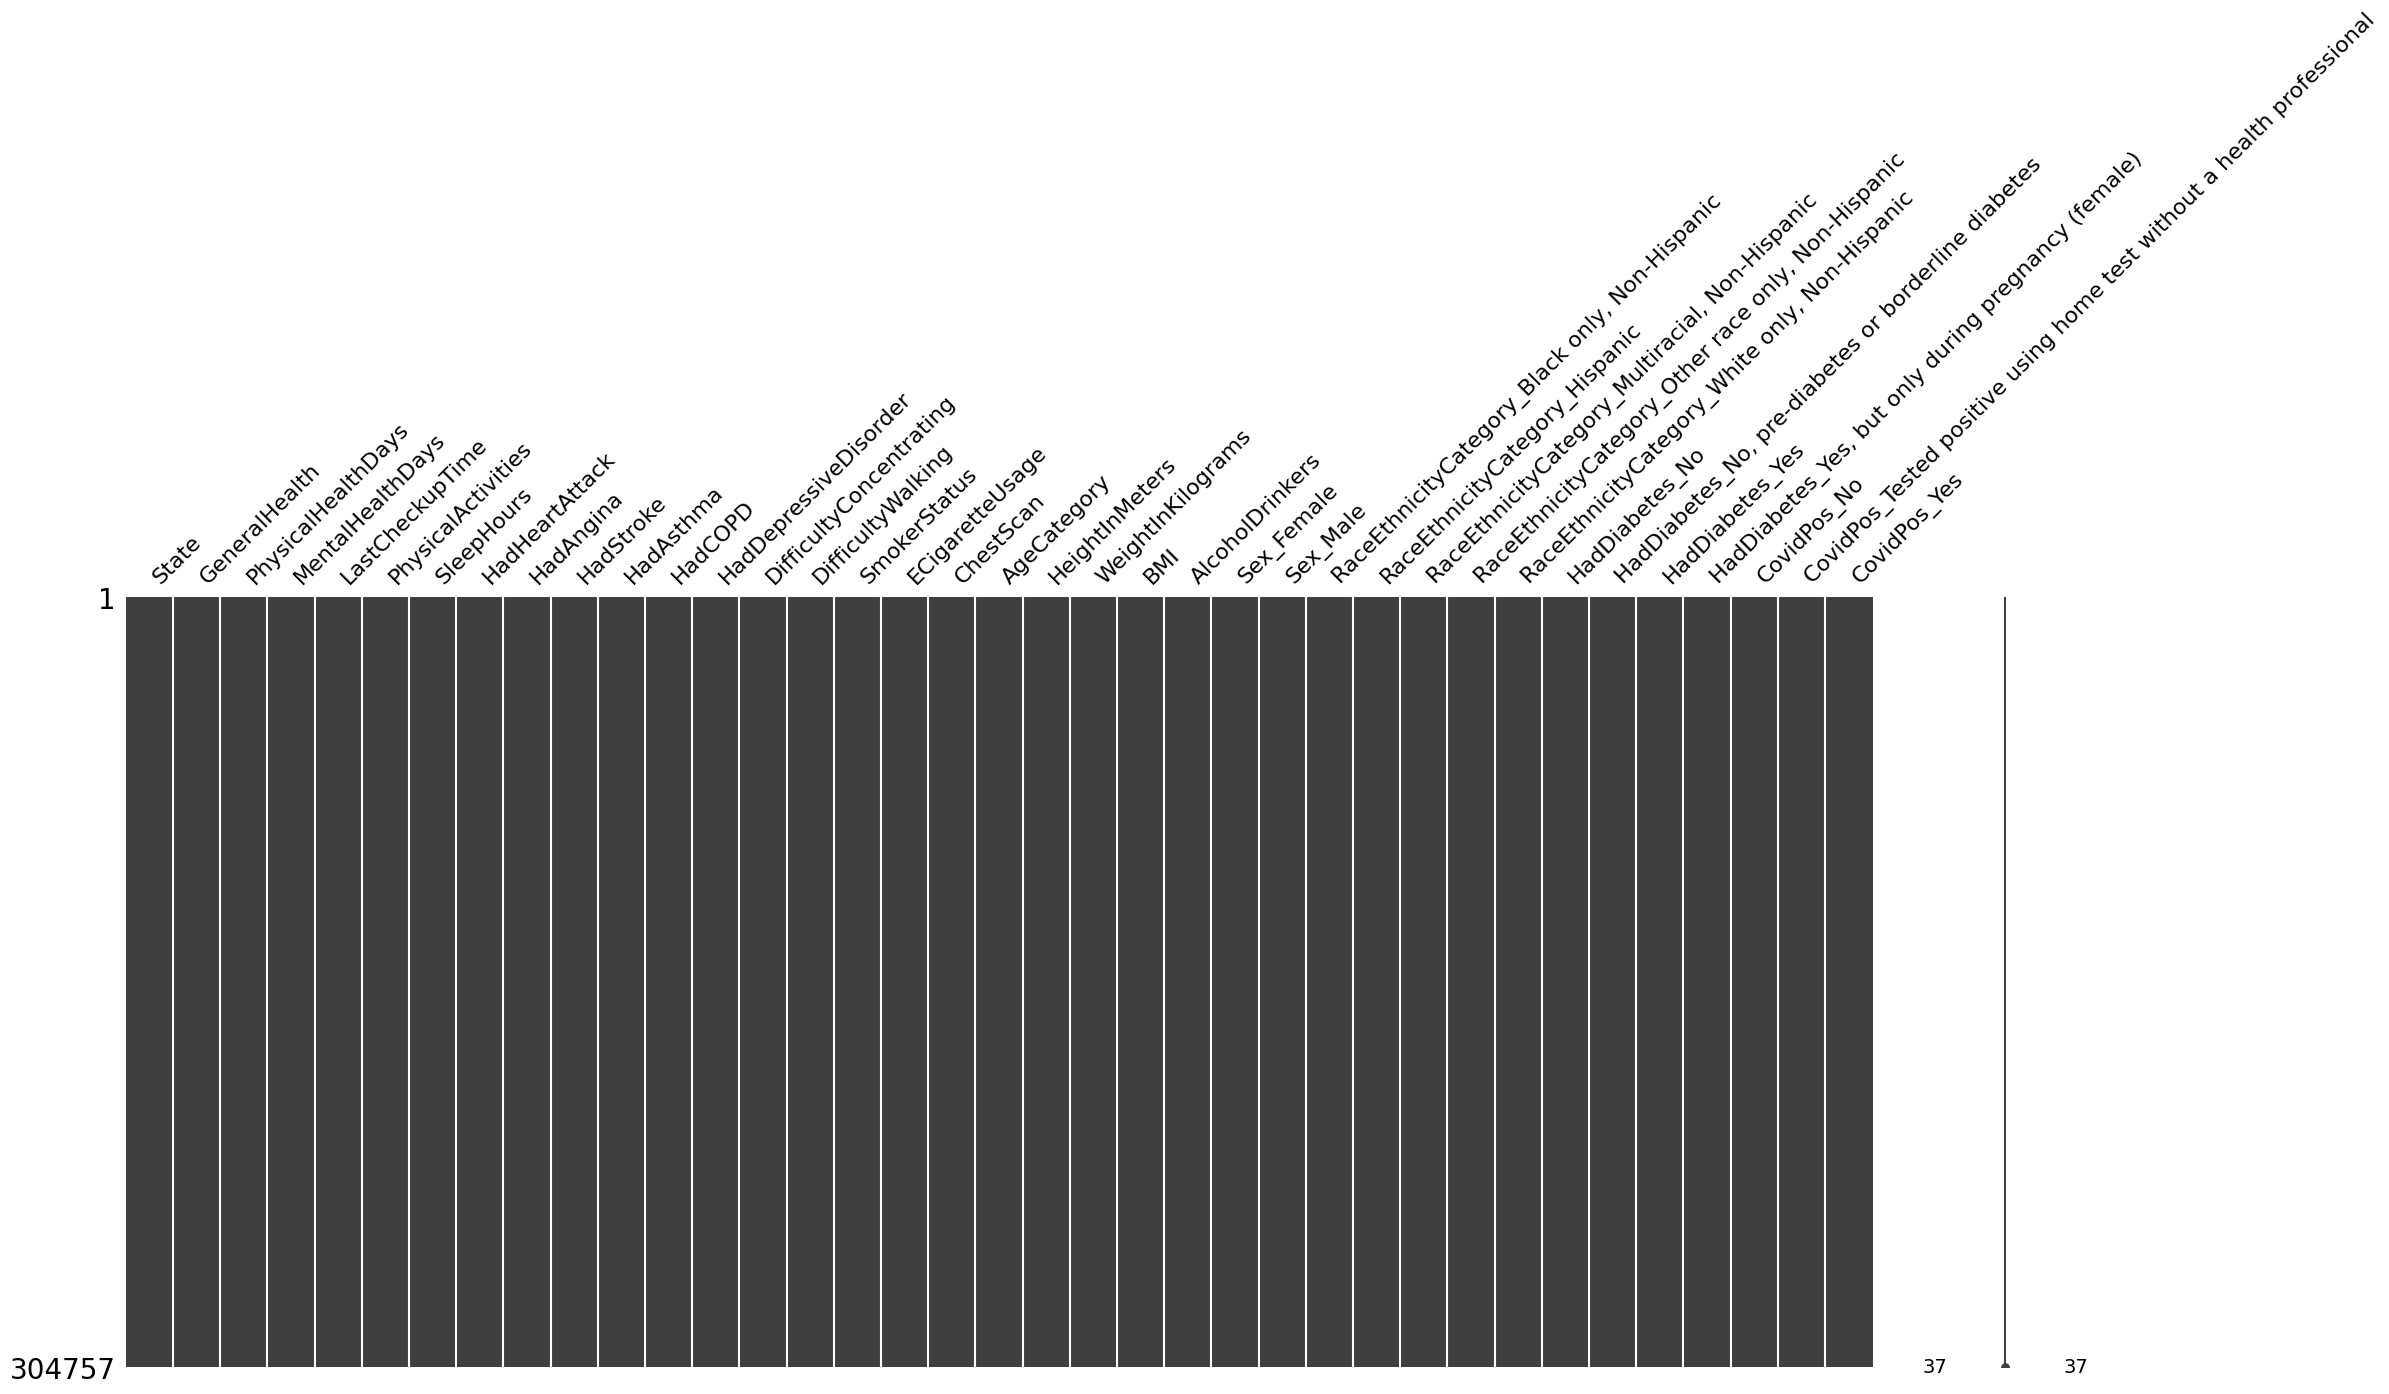

In [ ]:
msno.matrix(df_not_null_no)

## Missingness matrix for df_yes

<Axes: >

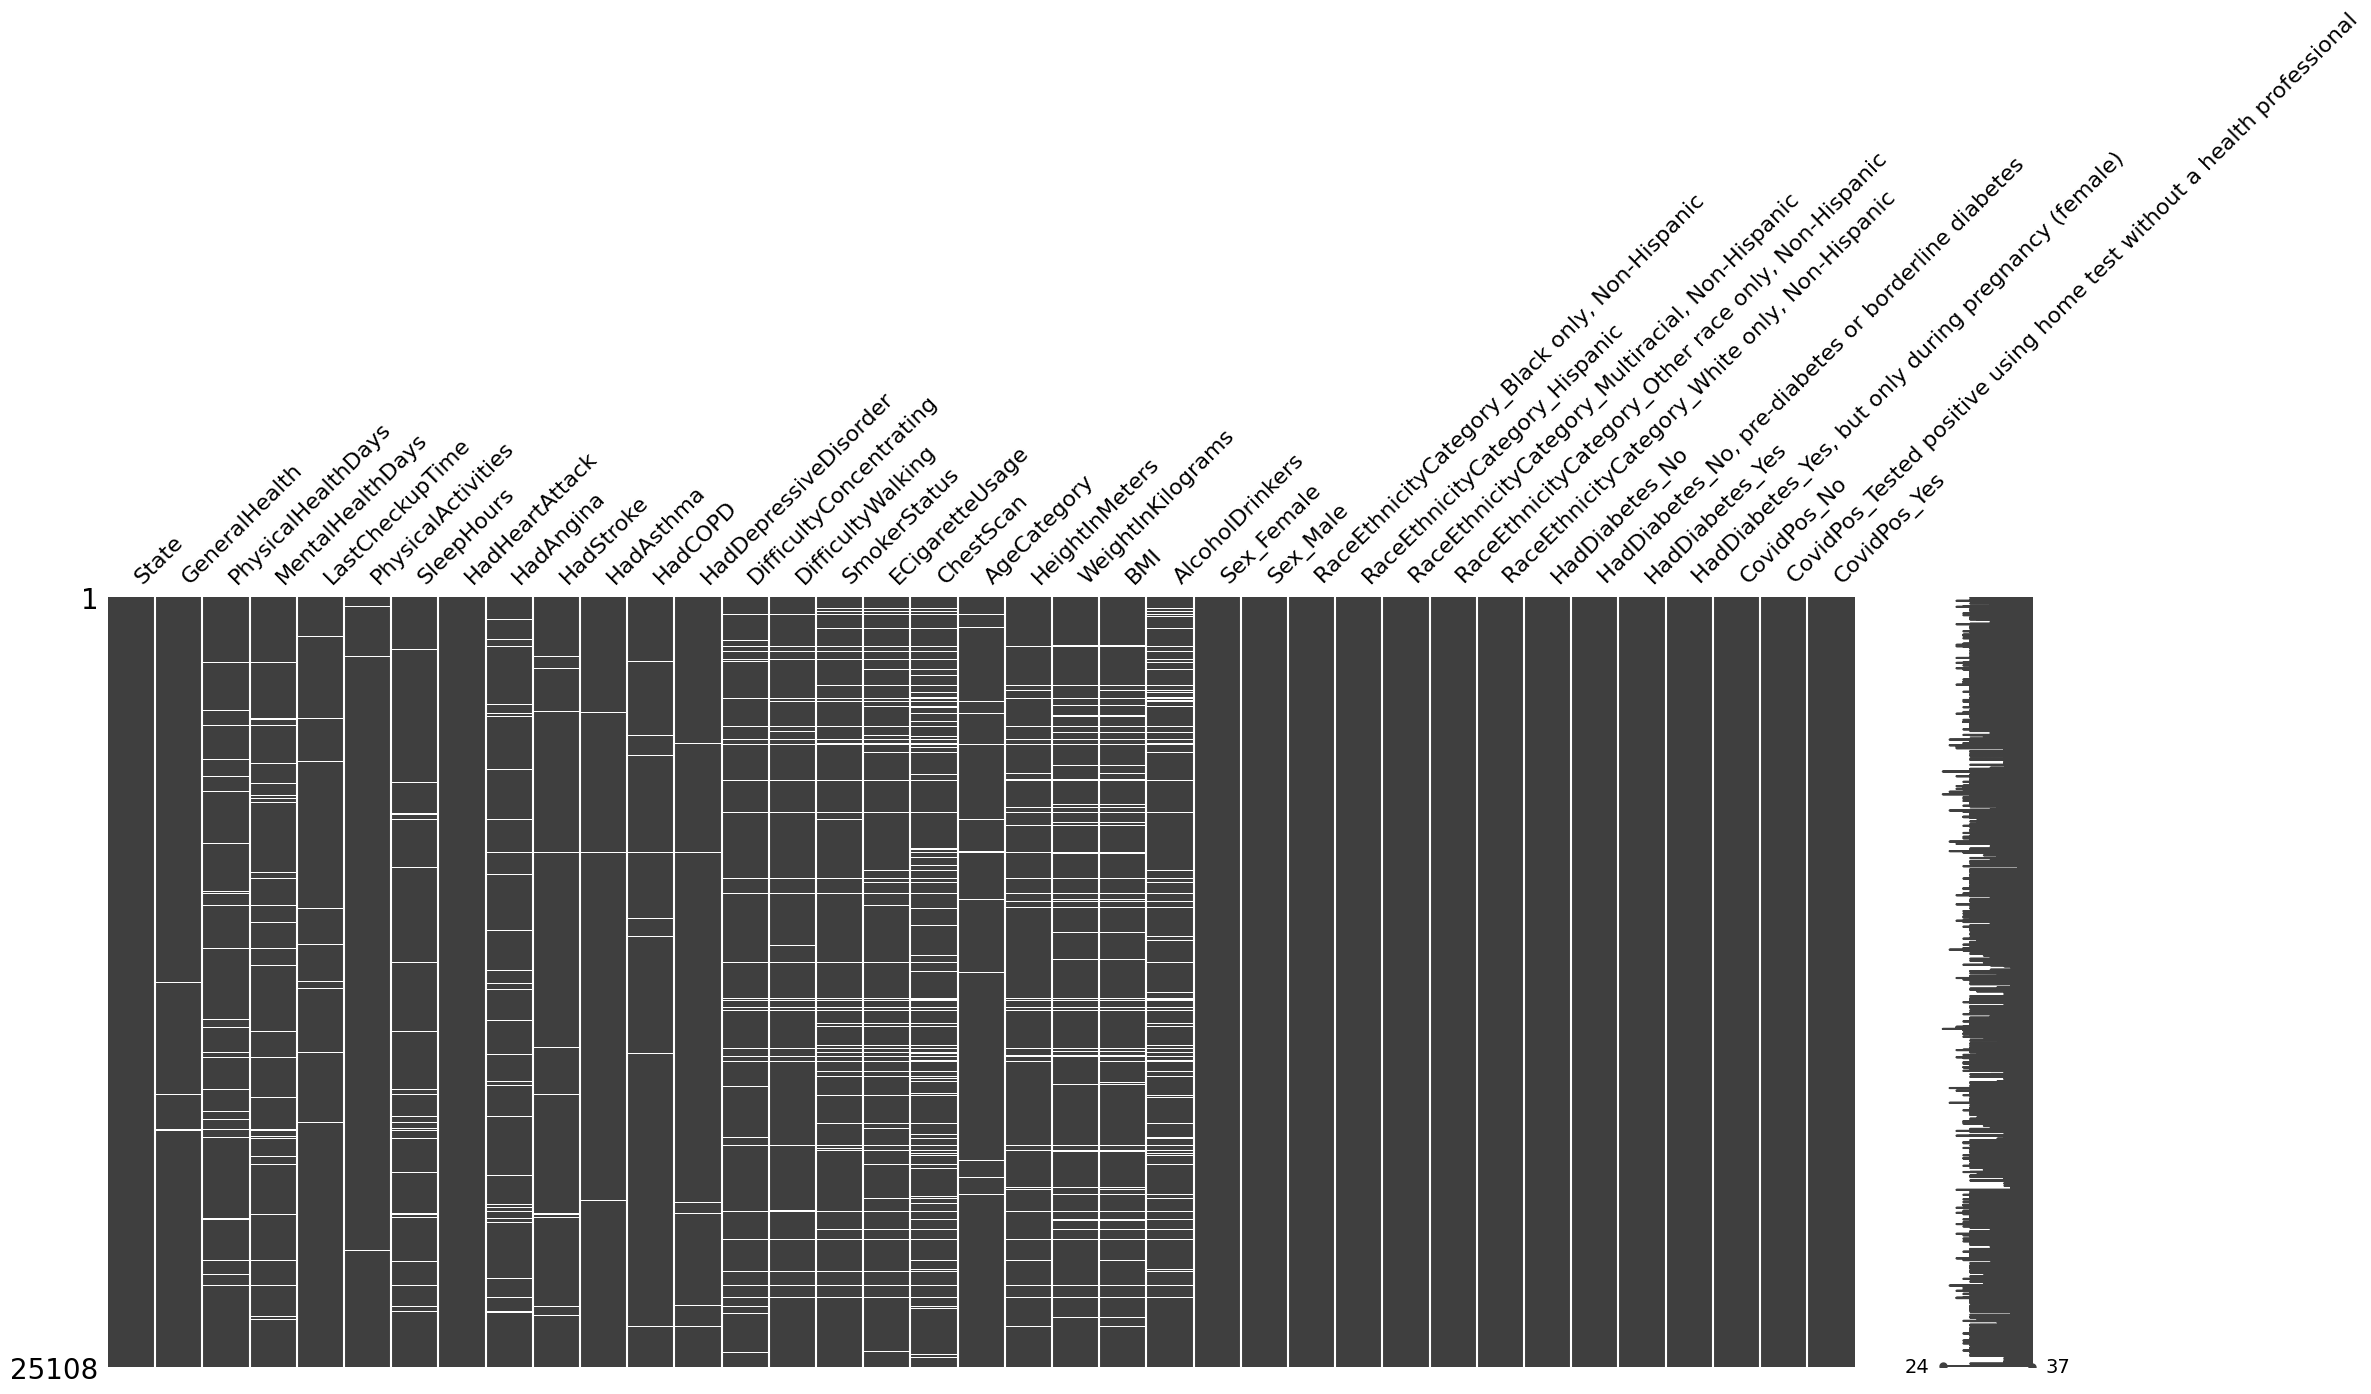

In [ ]:
msno.matrix(df_yes)

In [ ]:
df_yes.head()

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
5,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
26,Alabama,1.0,23.0,3.0,3.0,1.0,8.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
31,Alabama,1.0,30.0,0.0,3.0,1.0,4.0,1,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
32,Alabama,0.0,14.0,14.0,3.0,0.0,6.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
34,Alabama,1.0,NaN,0.0,3.0,1.0,10.0,1,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_yes.columns

Index(['State', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'CovidPos_Tested positive using home test without a health professio

In [ ]:
df = df_yes.copy(deep=True)
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
columns = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating',
       'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
       'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', ]
df[columns] = mice_imputer.fit_transform(df_yes[columns])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Imputing null values for "AgeCategory" using mode.

In [ ]:
df["AgeCategory"].mode()[0]

'Age 80 or older'

In [ ]:
df["AgeCategory"] = df["AgeCategory"].fillna(df["AgeCategory"].mode()[0])

## Missingness matrix for df

<Axes: >

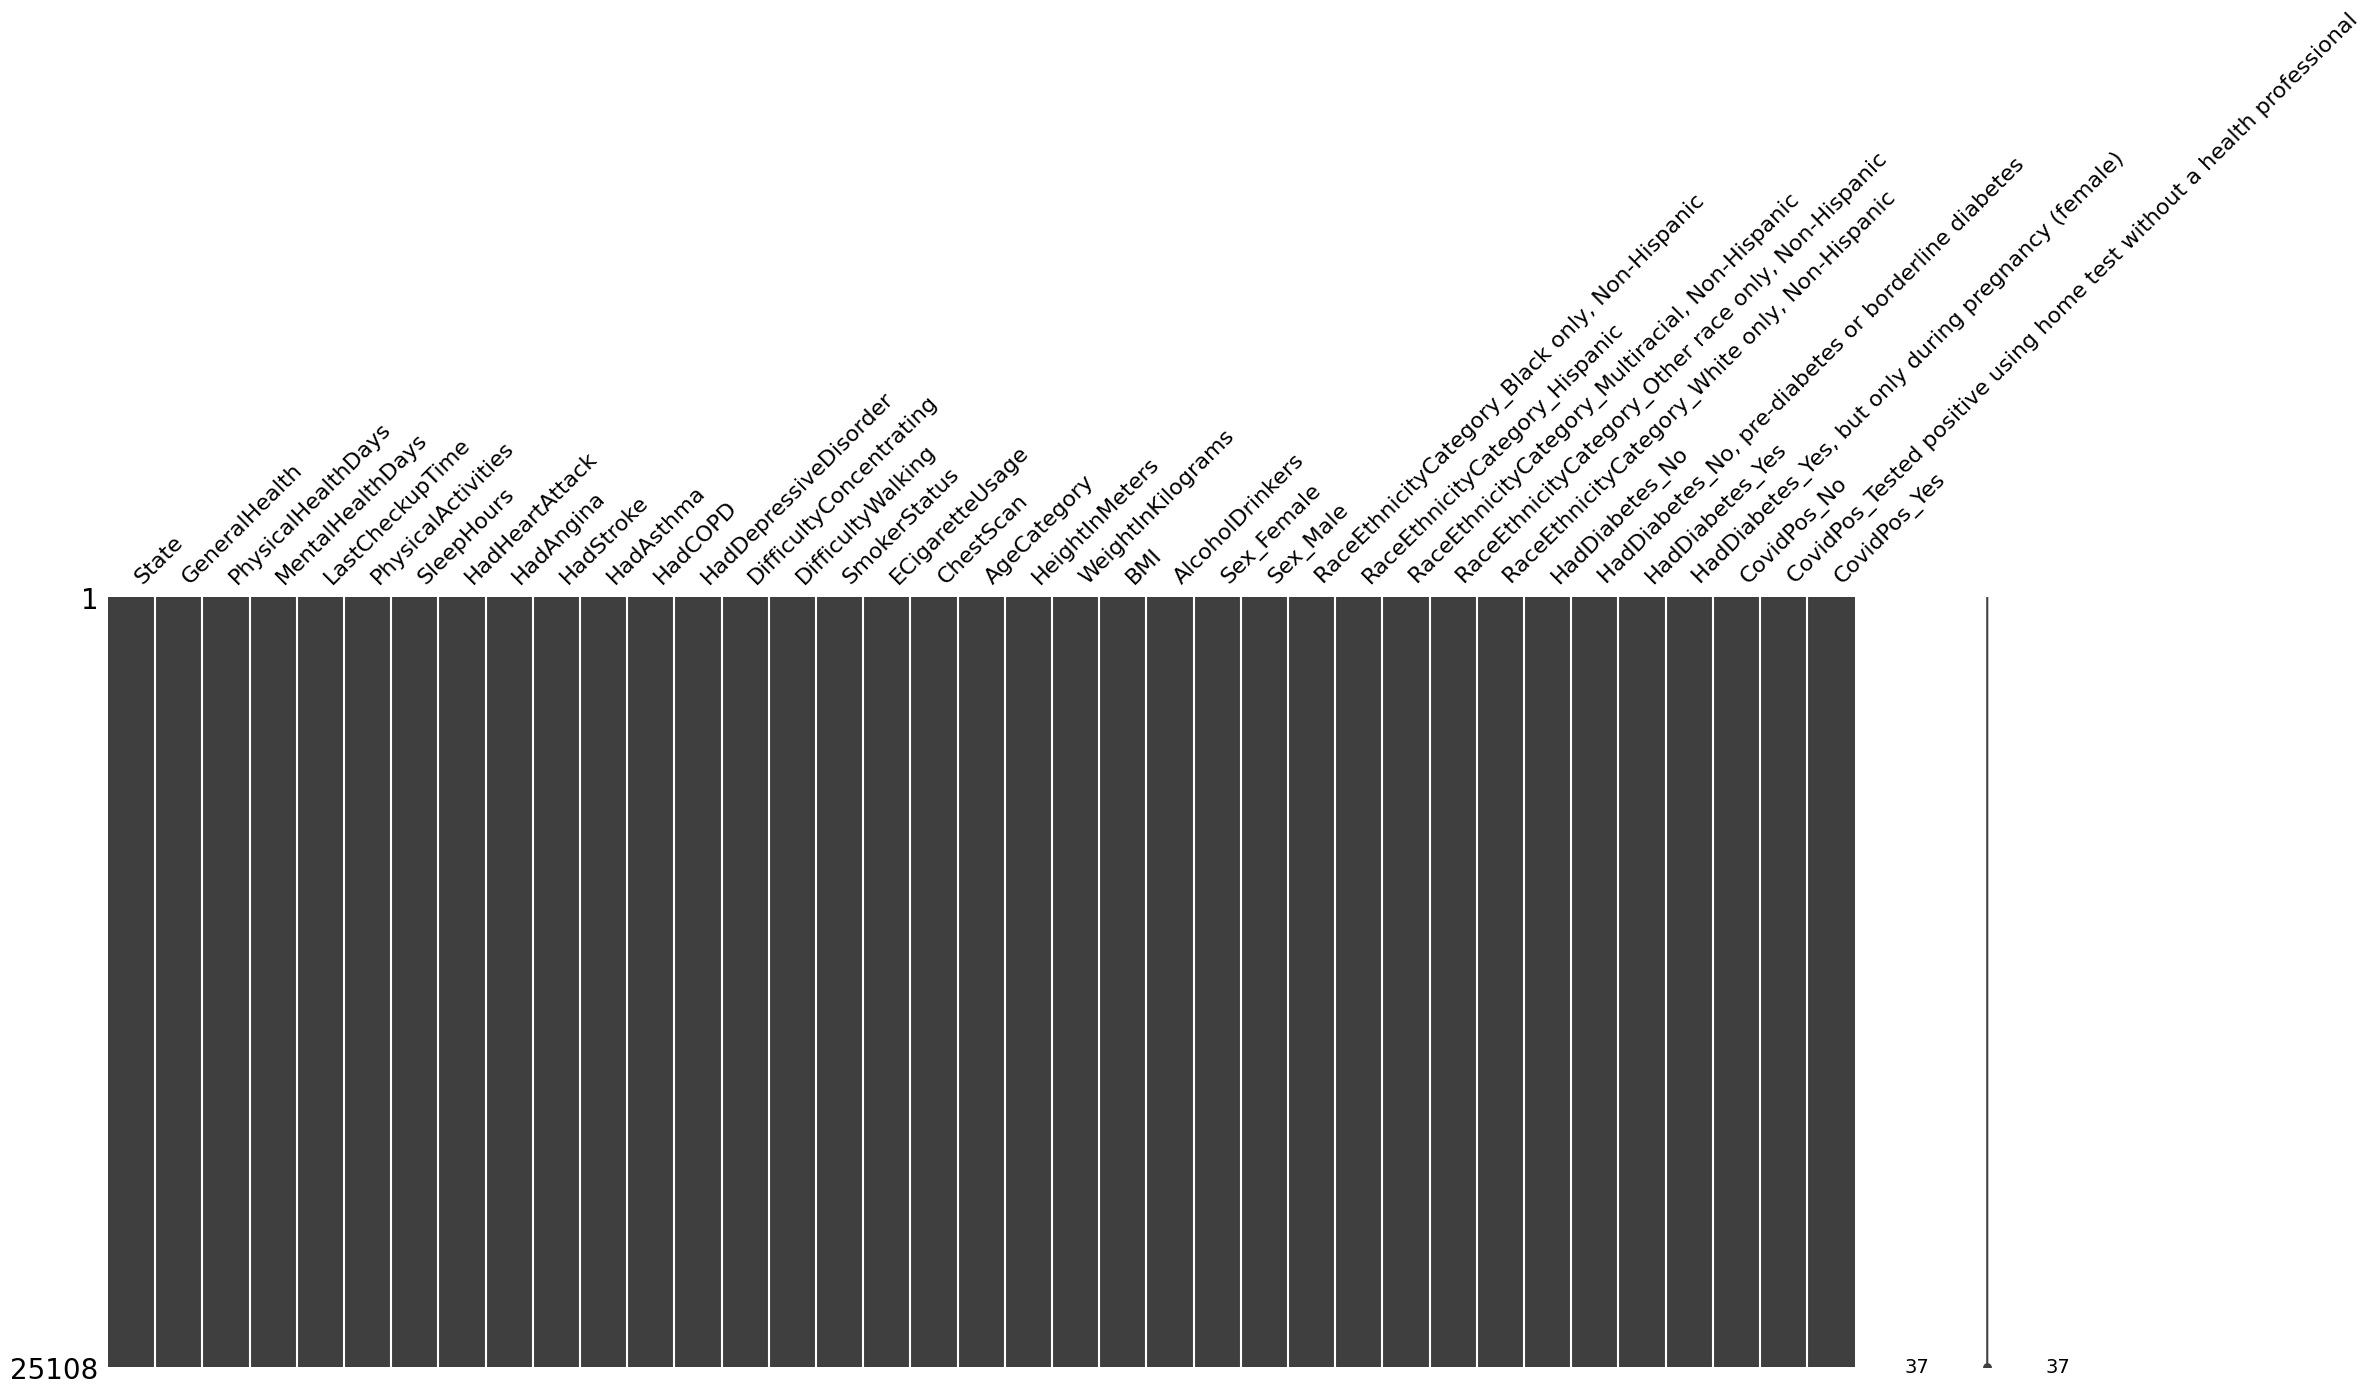

In [ ]:
msno.matrix(df)

## Concatenate df_not_null_no and df

In [ ]:
df_not_null_no.shape

(304757, 37)

In [ ]:
preprocessed_df = pd.concat([df_not_null_no, df], axis=0)
preprocessed_df.shape

(329865, 37)

# EDA

1. AgeCategory vs HadHeartAttack "Bar/Hist"
2. State vs HadHeartAttack "Bar/Hist"
3. 'PhysicalHealthDays' & 'MentalHealthDays' vs HadHeartAttack
4. BMI & HadHeartAttack

Multivariate
1. Correlation Matrix

In [ ]:
preprocessed_df.columns

Index(['State', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'CovidPos_Tested positive using home test without a health professio

In [ ]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329865 entries, 2 to 445130
Data columns (total 37 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   State                                                                   329865 non-null  object 
 1   GeneralHealth                                                           329865 non-null  float64
 2   PhysicalHealthDays                                                      329865 non-null  float64
 3   MentalHealthDays                                                        329865 non-null  float64
 4   LastCheckupTime                                                         329865 non-null  float64
 5   PhysicalActivities                                                      329865 non-null  float64
 6   SleepHours                                                          

In [ ]:
preprocessed_df.head()

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
2,Alabama,4.0,2.0,3.0,3.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Alabama,1.0,2.0,0.0,3.0,1.0,9.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Alabama,4.0,0.0,0.0,3.0,1.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Alabama,2.0,0.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10,Alabama,1.0,8.0,9.0,3.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
preprocessed_df.PhysicalHealthDays.unique()

array([ 2.        ,  0.        ,  8.        ,  5.        , 30.        ,
        4.        , 15.        ,  3.        ,  1.        ,  7.        ,
       14.        , 25.        ,  6.        , 10.        , 21.        ,
       20.        , 29.        , 16.        ,  9.        , 27.        ,
       28.        , 13.        , 12.        , 23.        , 26.        ,
       17.        , 24.        , 11.        , 18.        , 19.        ,
       22.        , 13.43014526,  7.96944235, 11.63864656,  5.99781676,
        8.93400048,  9.42426631, 21.56807491,  9.77021729, 12.53811027,
       14.65571624,  4.22744134, 14.16216407, 15.66789908, 19.16051772,
        9.61848105,  6.85375437, 12.63269888, 12.15444247, 24.09119849,
        4.45970707,  1.75894252,  8.25349847,  8.28552186, -0.69307923,
       14.14650819, 14.84180975, 11.00073965, -2.00212455, 12.22599695,
       11.22516886, 13.28785096, 10.79781794,  0.28442841, 14.44097804,
       10.76874489, -2.32984162, 15.31183097, 15.99418213,  8.72

# Graphical EDA

## AgeCategory vs HadHeartAttack

In [ ]:
preprocessed_df.AgeCategory

2            Age 55 to 59
4            Age 40 to 44
6         Age 80 or older
7         Age 80 or older
10        Age 80 or older
               ...       
445103       Age 75 to 79
445107       Age 65 to 69
445109       Age 18 to 24
445115       Age 55 to 59
445130       Age 70 to 74
Name: AgeCategory, Length: 329865, dtype: object

<ipython-input-59-a0024918a89d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AgeCategory",y="HadHeartAttack",data=preprocessed_df,estimator=sum, ci=None, hue="State")


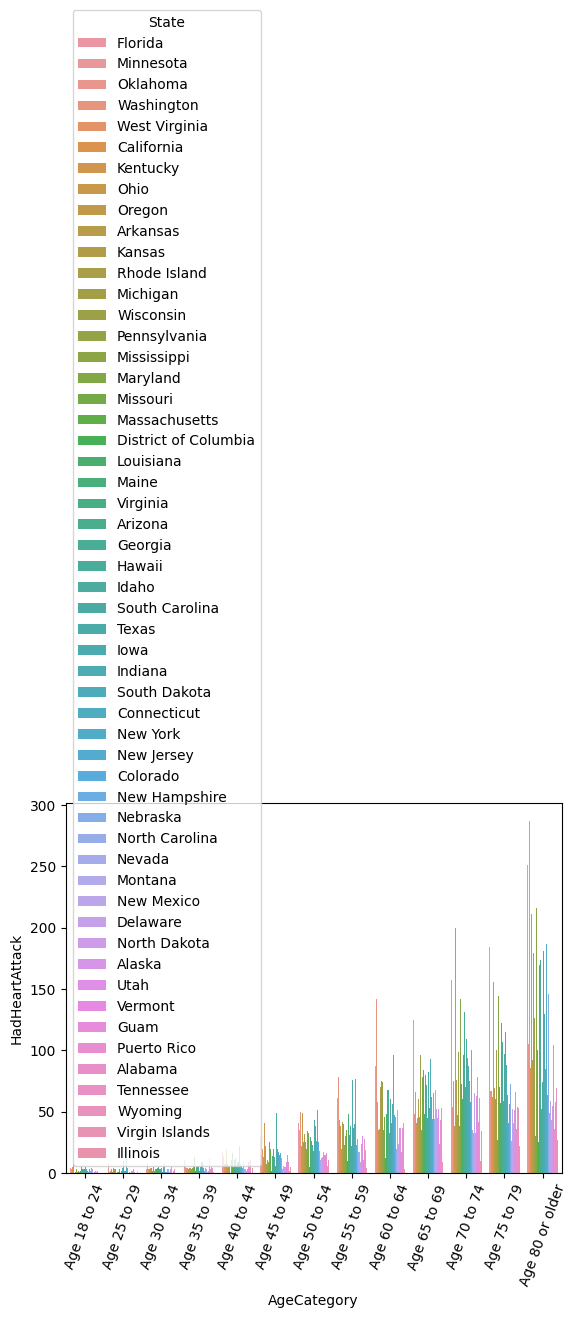

In [ ]:
preprocessed_df.sort_values("AgeCategory", inplace = True)
sns.barplot(x="AgeCategory",y="HadHeartAttack",data=preprocessed_df,estimator=sum, ci=None, hue="State")
plt.xticks(rotation=70)
plt.show()

## State vs HadHeartAttack "Bar/Hist"

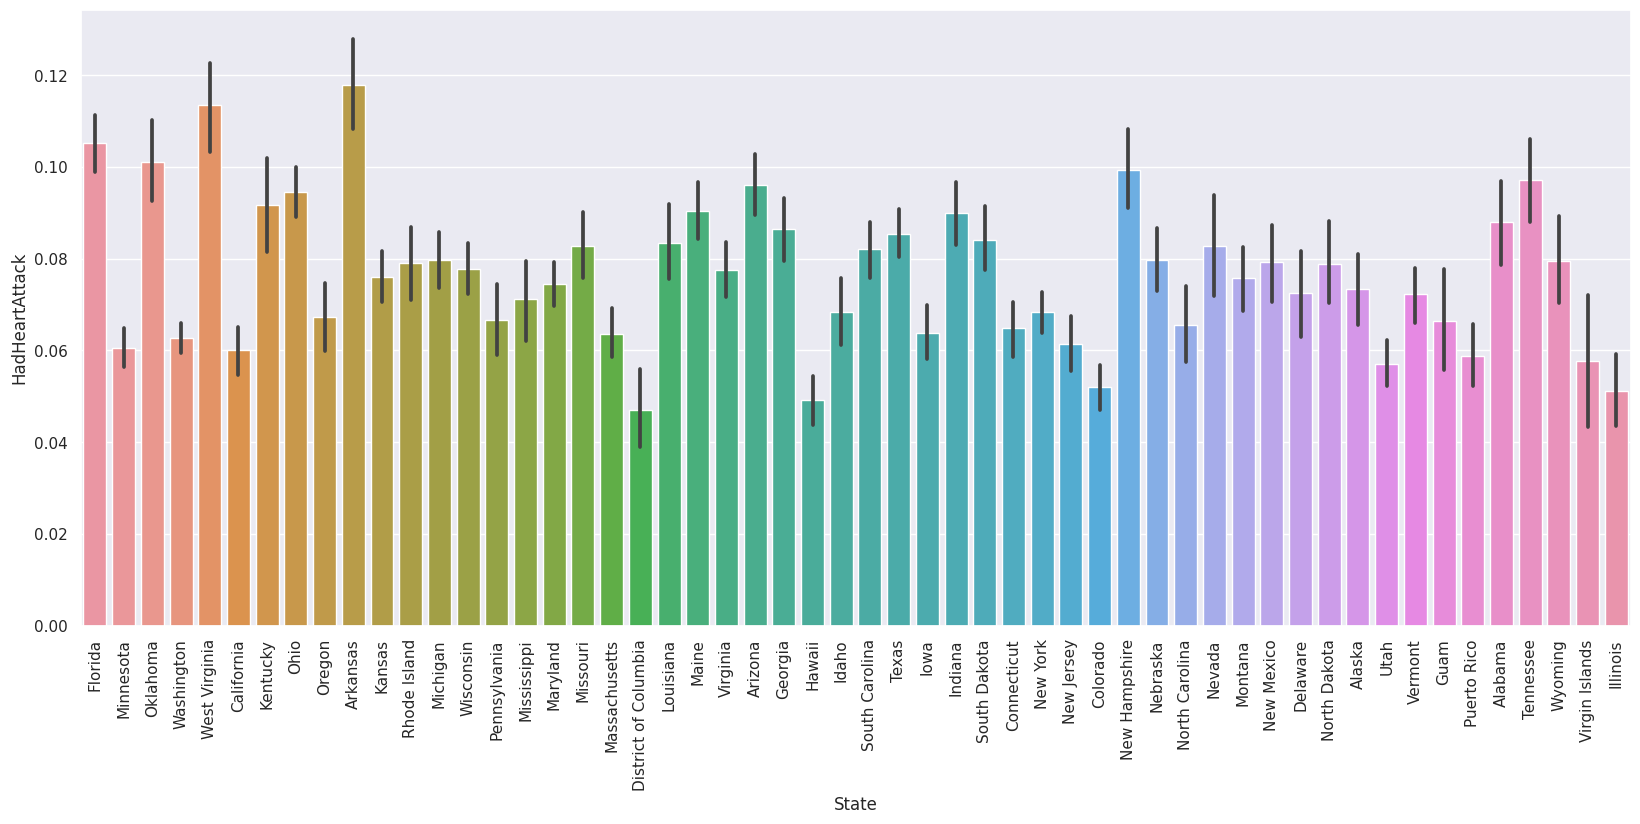

In [ ]:
# setting the figure size
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(x="State",y="HadHeartAttack",data=preprocessed_df )
plt.xticks(rotation=90)
plt.show()

## BMI & HadHeartAttack

Text(0, 0.5, 'HadHeartAttack')

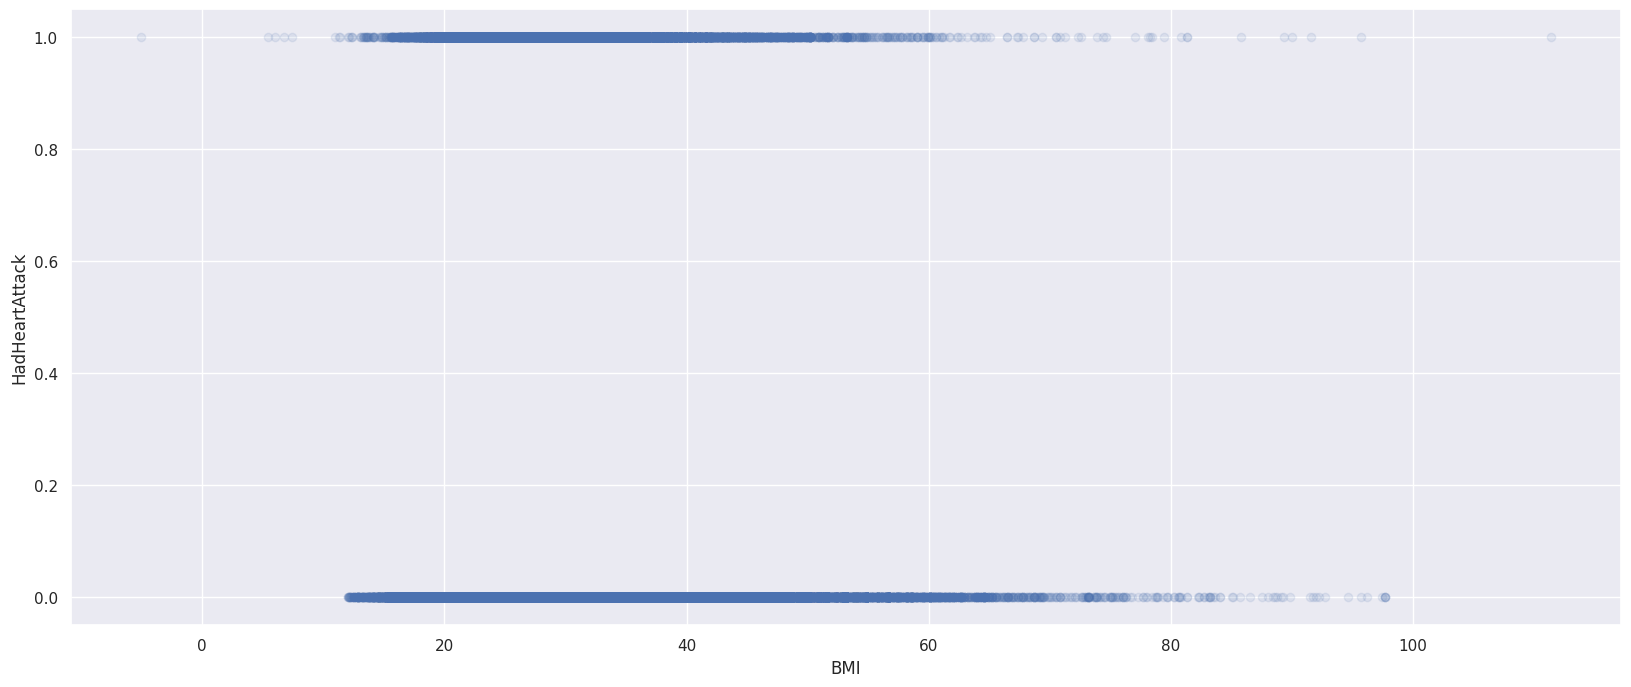

In [ ]:
plt.scatter(preprocessed_df.BMI, preprocessed_df.HadHeartAttack, alpha=0.1)
plt.xlabel("BMI")
plt.ylabel("HadHeartAttack")

## 'PhysicalHealthDays' & 'MentalHealthDays' vs HadHeartAttack

Text(0.5, 1.0, 'Boxplot of numerical values')

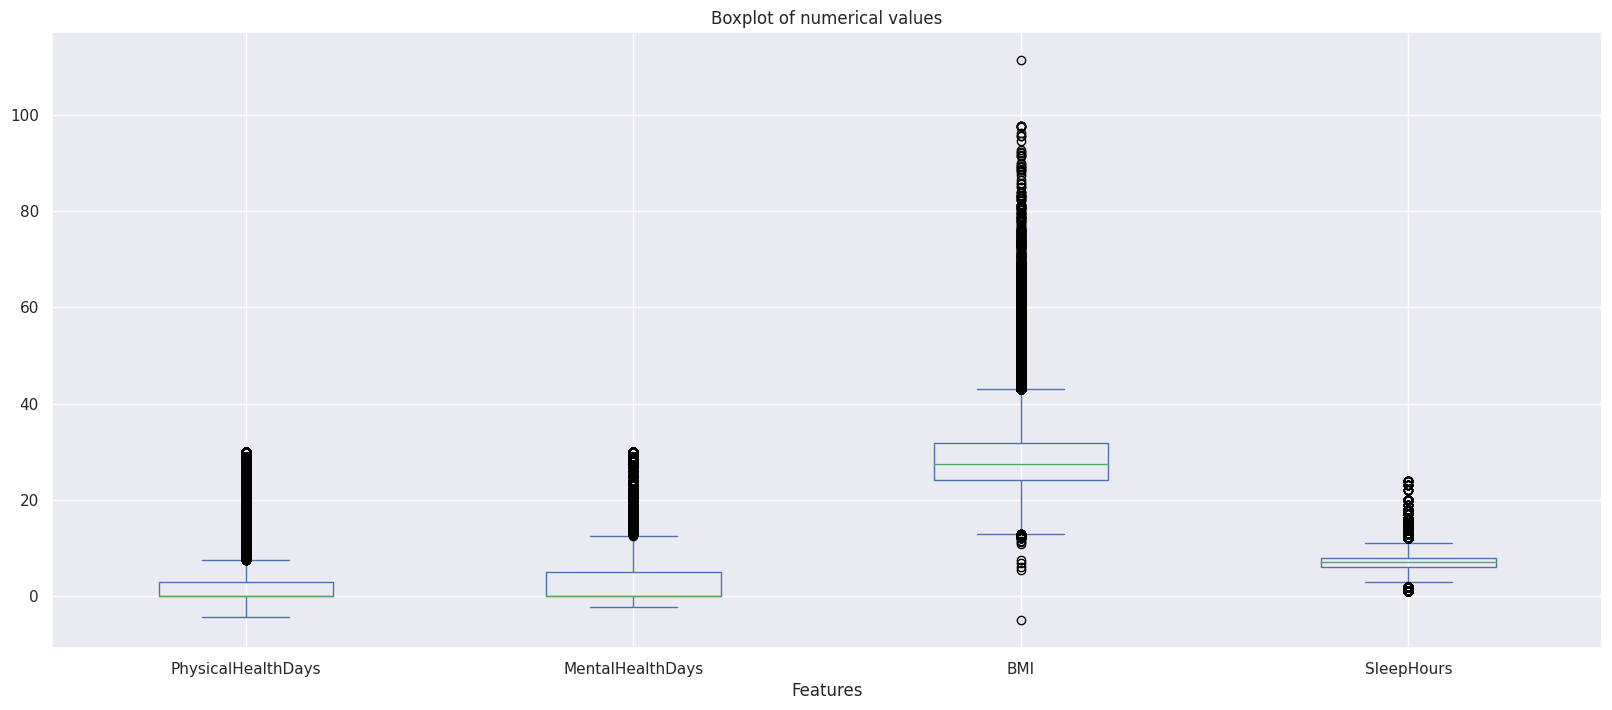

In [ ]:
# sns.boxplot(x = preprocessed_df['PhysicalHealthDays'],
#             y = preprocessed_df['HadHeartAttack'],
            # data = df, color='Blue')


# sns.boxplot(y = preprocessed_df['MentalHealthDays'],
#             data = df, color='green')

# sns.boxplot(y = preprocessed_df['PhysicalHealthDays'],
#             data = df, color='green')
# plt.xlabel("PhysicalHealthDays & MentalHealthDays")
# plt.ylabel("HadHeartAttack")
# plt.show()
preprocessed_df[['PhysicalHealthDays','MentalHealthDays',"BMI","SleepHours"]].plot(kind="box")
plt.xlabel("Features")
plt.title("Boxplot of numerical values")

## Correlation

<ipython-input-63-c13d5028e850>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = preprocessed_df.corr()


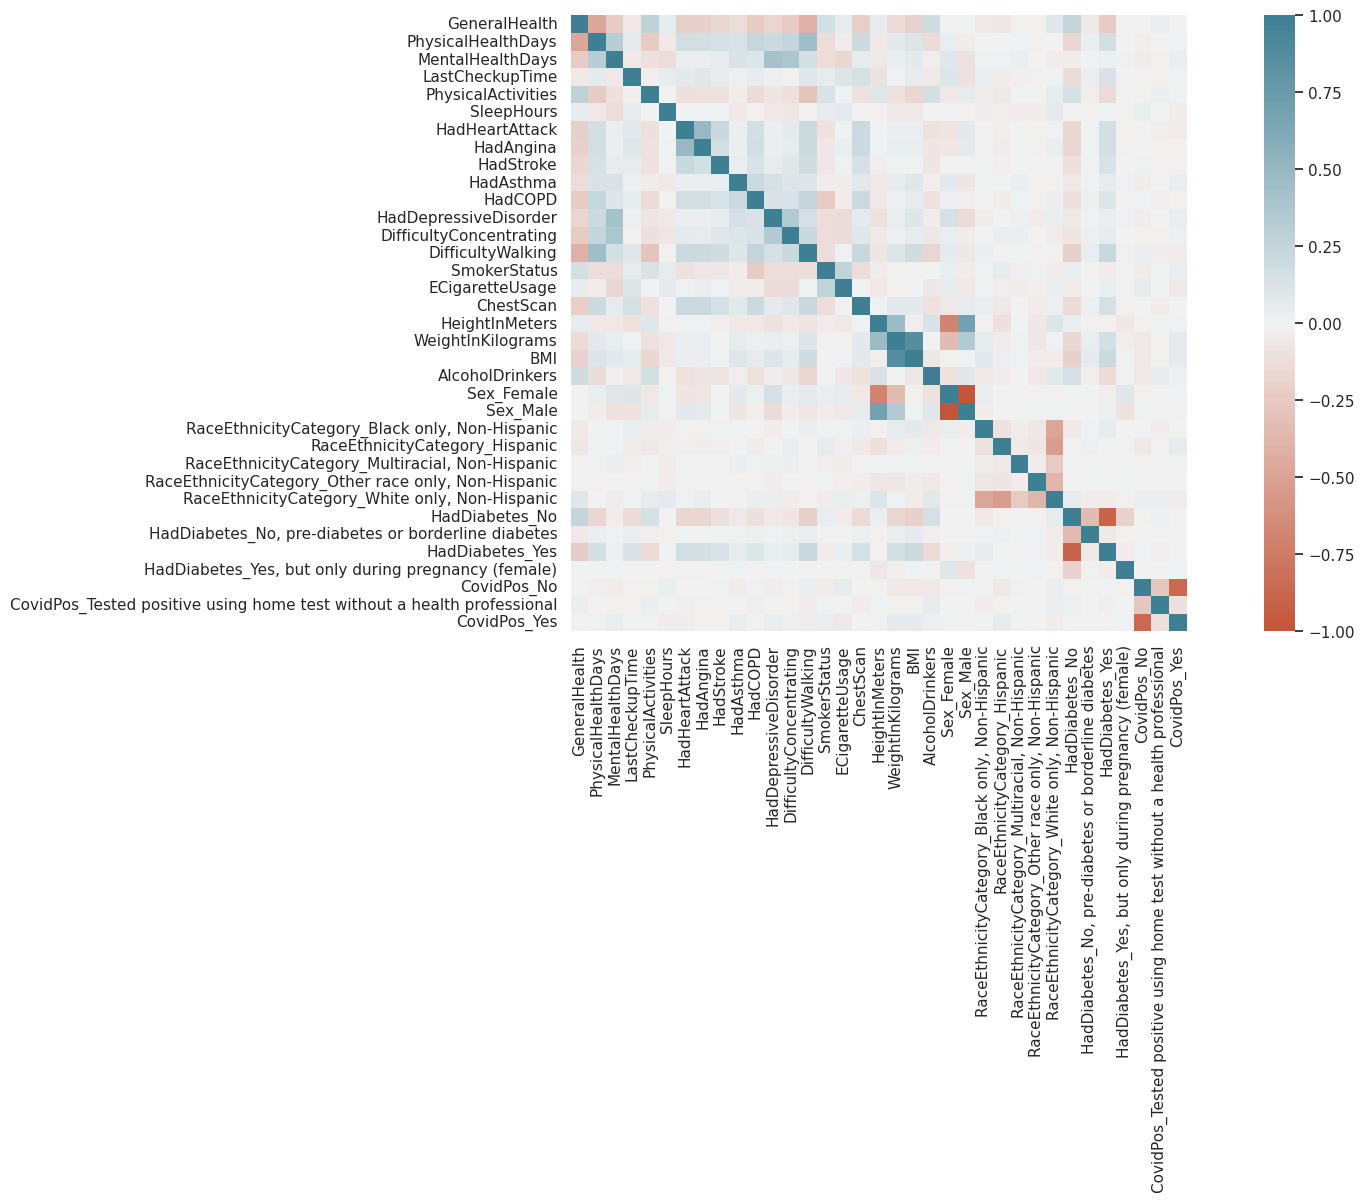

In [ ]:
corr = preprocessed_df.corr()
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.show()

# Non-Graphical EDA

## 1. describe() for numerical data

In [ ]:
preprocessed_df.describe()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
count,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,...,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000
mean,2.642797,4.308136,4.341561,2.656604,0.772817,7.021521,0.076116,0.070113,0.044907,0.150775,...,0.022158,0.049096,0.741616,0.828724,0.022630,0.139354,0.008161,0.660131,0.034278,0.277589
std,1.199654,8.600641,8.270274,0.777513,0.418942,1.462387,0.265184,0.253580,0.206845,0.357751,...,0.147196,0.216068,0.437747,0.376751,0.148723,0.346316,0.089969,0.473665,0.181942,0.447810
min,-0.258960,-4.255814,-2.235624,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,3.000000,5.000000,3.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,30.000000,30.000000,3.086967,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. describe() for object data

In [ ]:
preprocessed_df.describe(include = object)

,State,AgeCategory
count,329865,329865
unique,54,13
top,Washington,Age 65 to 69
freq,19645,36510


## 3. Median



In [ ]:
preprocessed_df =  preprocessed_df.sort_values(by = "BMI", ascending = True)
print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.median())
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.median())


Yes 28.869193643348552
No 27.44


## 4. Mean

In [ ]:

print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.mean())
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.mean())

Yes 29.3207413955943
No 28.53031474256539


## 5. Mode

In [ ]:

print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.mode()[0])
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.mode()[0])

Yes 26.63
No 26.63


# Downsampling


In [ ]:
print(preprocessed_df["HadHeartAttack"].value_counts(),preprocessed_df["HadHeartAttack"].value_counts()/preprocessed_df.shape[0]*100)

0.0    304757
1.0     25108
Name: HadHeartAttack, dtype: int64 0.0    92.388401
1.0     7.611599
Name: HadHeartAttack, dtype: float64


In [ ]:
df_majority = preprocessed_df[preprocessed_df["HadHeartAttack"]==0]
print("Majority",df_majority.shape)
df_minority = preprocessed_df[preprocessed_df["HadHeartAttack"]==1]
print("Minority",df_minority.shape)

Majority (304757, 37)
Minority (25108, 37)


## Downsampling the majority class (No)

In [ ]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=int(0.5*df_majority.shape[0]), random_state = 42)
print("Majority downsampled",df_majority_downsampled.shape)
df_majority_downsampled.head()

Majority downsampled (152378, 37)


,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
166320,Maryland,4.0,1.0,15.0,3.0,1.0,11.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
417023,West Virginia,4.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
145179,Maine,2.0,3.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
275208,New York,2.0,0.0,0.0,3.0,1.0,7.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
87477,Hawaii,4.0,0.0,0.0,3.0,1.0,8.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Upsampling

In [ ]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=int(0.5*df_majority.shape[0]), random_state=42)
print("Minority Upsampled",df_minority_upsampled.shape)
df_minority_upsampled.head()

Minority Upsampled (152378, 37)


,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
143915,Louisiana,0.0,20.0,0.0,3.0,0.0,7.173464,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
191097,Michigan,1.0,2.0,7.0,3.0,0.0,5.000000,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4395,Alabama,4.0,0.0,0.0,3.0,1.0,7.366909,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
103698,Illinois,1.0,12.0,0.0,3.0,0.0,4.000000,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15008,Arizona,2.0,0.0,0.0,3.0,1.0,8.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Combine the sampled classes
sampled_df = pd.concat([df_majority_downsampled, df_minority_upsampled])
sampled_df = sampled_df.sort_index().reset_index().drop("index",axis=1)
sampled_df.head()

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,Alabama,4.0,2.0,3.0,3.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Binary Encoding on "State" column

In [ ]:
encoder = BinaryEncoder(cols=["State"], drop_invariant=True)
encoder.fit(sampled_df)
sampled_df_enc = encoder.transform(sampled_df)
sampled_df_enc.head()

,State_0,State_1,State_2,State_3,State_4,State_5,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0,0,0,0,1,4.0,2.0,3.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


##Label encoding on "AgeCategory" column

In [ ]:
labelencoder = LabelEncoder()
sampled_df_enc['AgeCategory'] = labelencoder.fit_transform(sampled_df_enc['AgeCategory'])
sampled_df_enc['AgeCategory'].unique()

array([ 7, 12, 10, 11,  9,  8,  5,  6,  4,  3,  1,  2,  0])

# Next steps:
- Train Test Validation Split
- Feature Engineering
  - [ ] Feature Extraction (Dimension Reduction) [ ] check if needed
  - [ ] Feature Selection
- [ ] Define Metrics to use
  - [ ] Recall
  - [ ] Confusion matrix
  - [ ] Precision
- Modelling (K fold, Hyperparameter tuning, performance metrics, prediction on test data )
  - [ ] Logistic Regression
  - [ ] k-Nearest Neighbors
  - [ ] Support Vector Machines
- [ ] Address Maam's comments

## Train Test Split

### Defining X and y

In [ ]:
final_df = sampled_df_enc
final_df.columns

Index(['State_0', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'Cov

In [ ]:

X = final_df[['State_0', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'CovidPos_Tested positive using home test without a health professional',
       'CovidPos_Yes']]

y = final_df['HadHeartAttack']

### Splitting data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

In [ ]:
print("Train X:",X_train.shape,"Train Y:",y_train.shape,"Test X:",X_test.shape,"Test Y:",y_test.shape)

Train X: (243804, 41) Train Y: (243804,) Test X: (60952, 41) Test Y: (60952,)


## 1. K-Nearest Neighbors

Reference: https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/

In [ ]:
X_train.info()

## Training the model


## a) Using thumb rule to chose K value and train the model

In [ ]:
k = int(math.sqrt(X_train.shape[0]))

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

In [ ]:
print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.7474159570802776, 0.743585116156976]


## b) Using Cross Validation GridSearchCV to use best K-Value

In [ ]:
# param_grid = {'n_neighbors': range(2,22)}
# k = int(math.sqrt(X_train.shape[0]))

# knn = KNeighborsClassifier(n_neighbors = k)

# grid_search = GridSearchCV(knn, param_grid, cv = 5)

# grid_search.fit(X_train, y_train)

# print("Optimal value of n_neighbors: ", grid_search.best_params_['n_neighbors'])

Optimal value of n_neighbors:  2


## Using K =17, train the model

In [ ]:
k = 17

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.8156264868500926, 0.7919838561491009]


In [ ]:
k = 2

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.9975800232974028, 0.9360316314476965]


In [ ]:
k = 10


clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.8515487850896621, 0.8098831867699173]


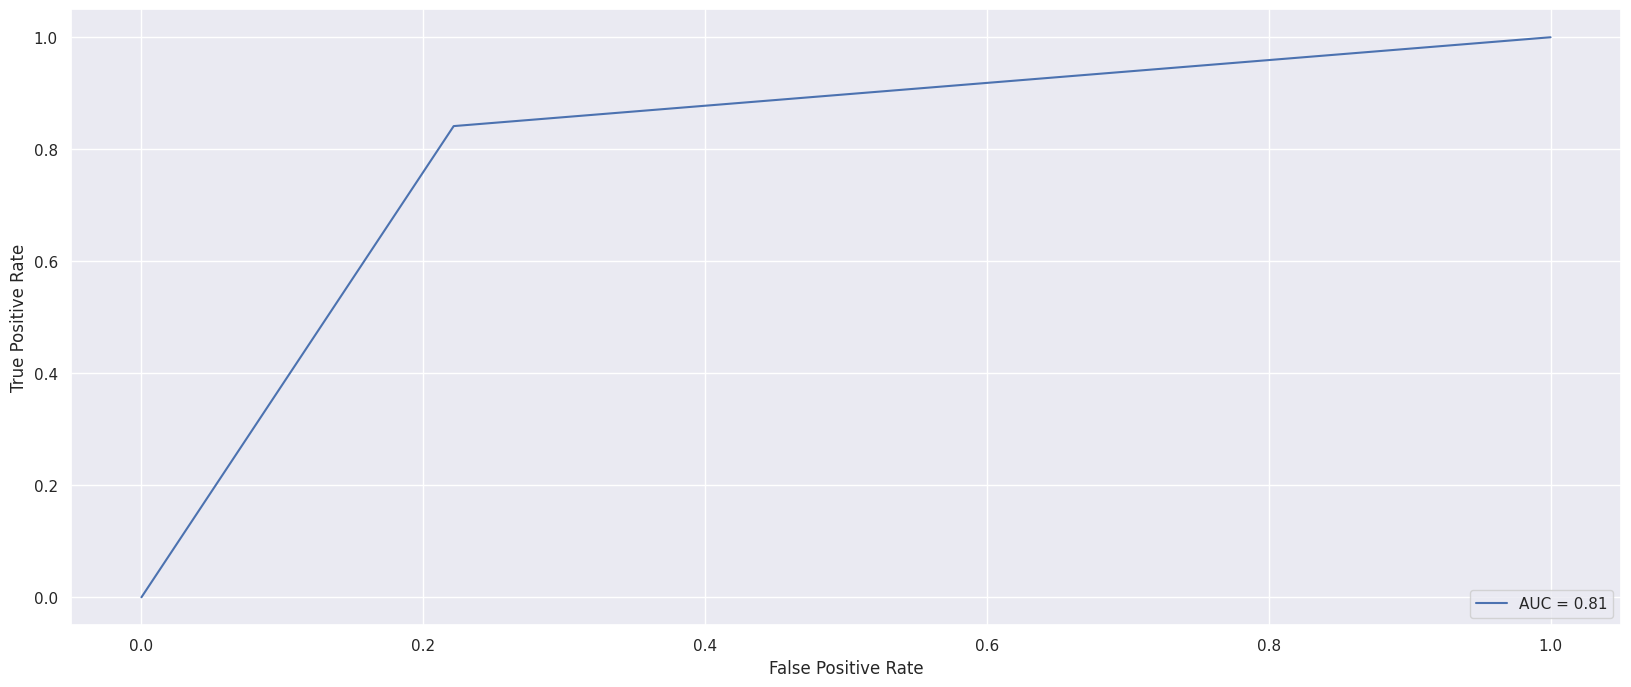

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
# plt.title("ROC-AUC curve for KNN")
display.plot()

In [ ]:
logreg = LogisticRegression(random_state = 16,C= 0.1, penalty= 'l2', solver= 'liblinear')
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[25894,  4582],
       [ 6549, 23927]])

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred_log, target_names=target_names))

                  precision    recall  f1-score   support

Not Heart Attack       0.80      0.85      0.82     30476
Had Heart Attack       0.84      0.79      0.81     30476

        accuracy                           0.82     60952
       macro avg       0.82      0.82      0.82     60952
    weighted avg       0.82      0.82      0.82     60952



Text(0.5, 709.5555555555555, 'Predicted\xa0label')

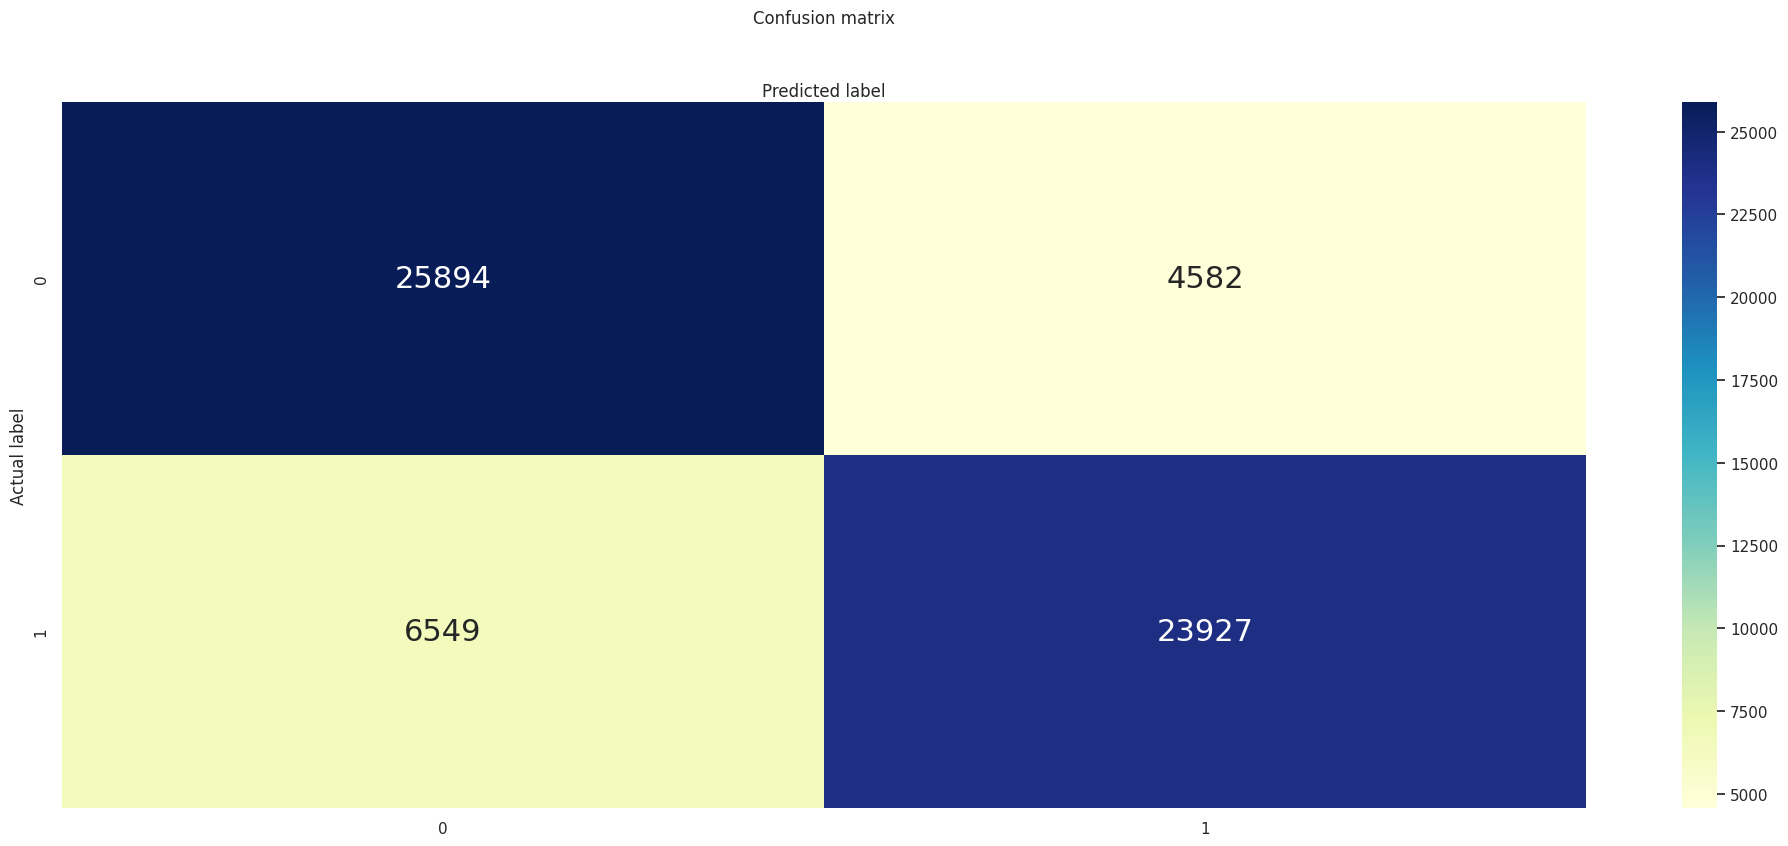

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

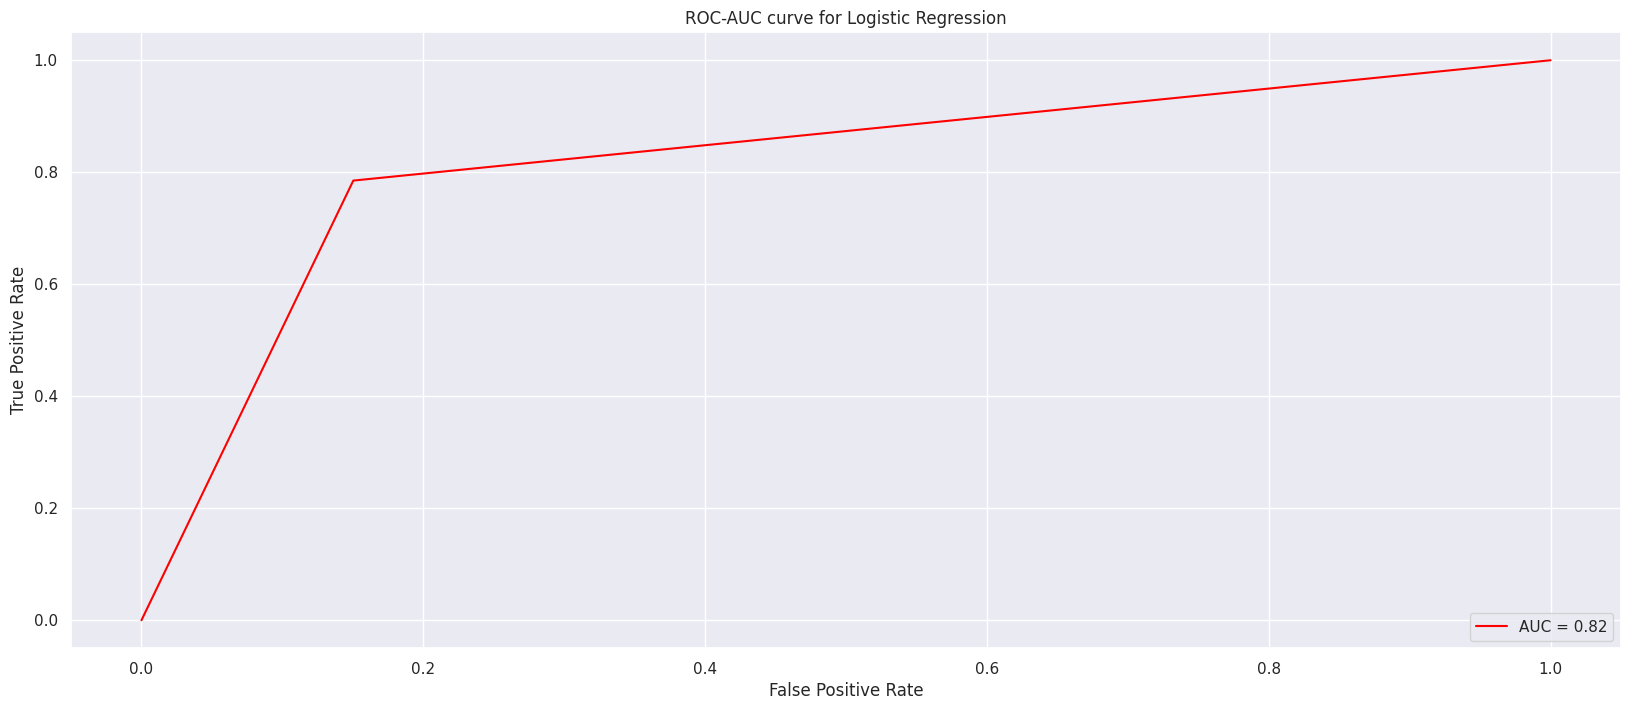

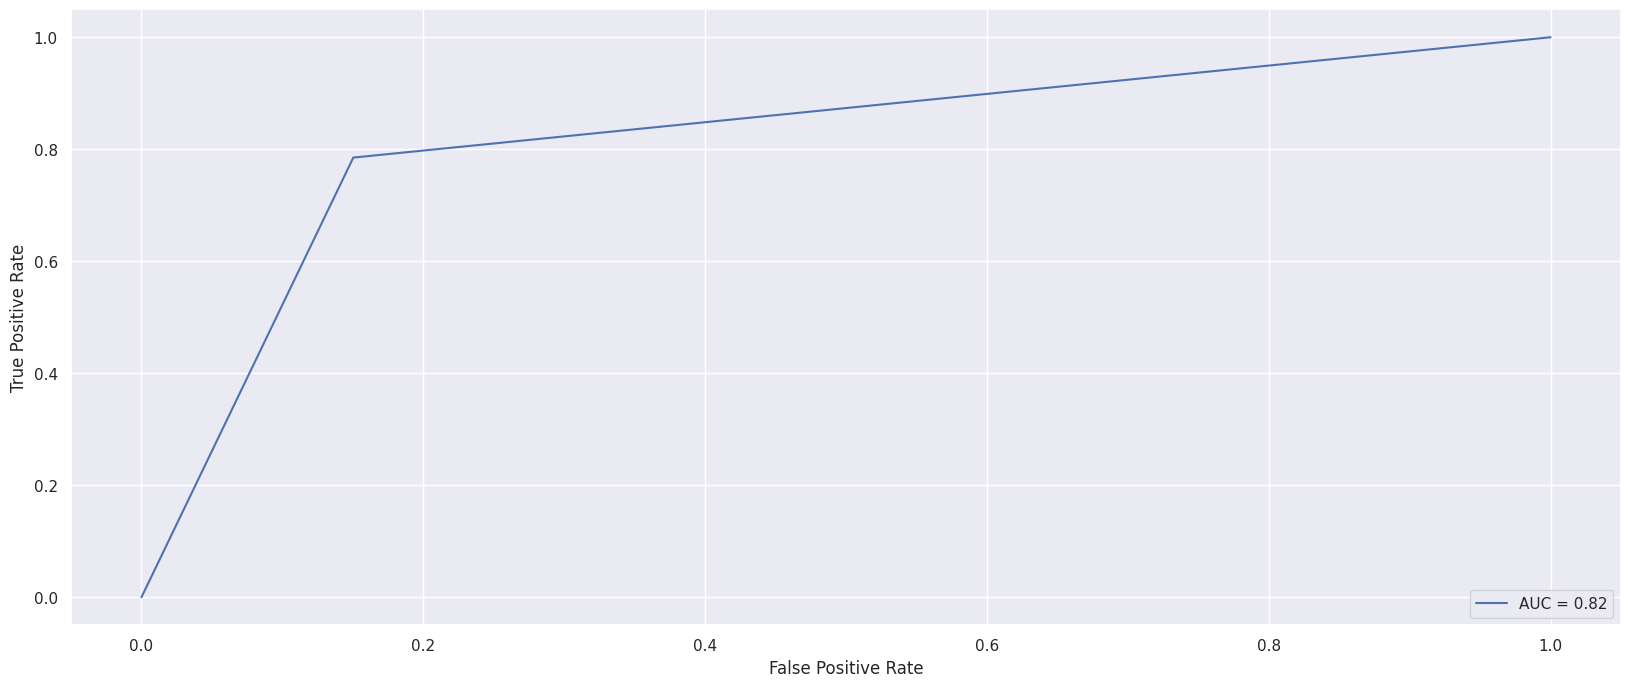

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(color='red')  # Change 'red' to your desired color
plt.title("ROC-AUC curve for Logistic Regression")
display.plot()

## Evaluating the model

### Confusion matrix for K = 17

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27424,  3052],
       [  847, 29629]])

### Confusion matrix evaluation metrics

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Not Heart Attack       0.97      0.90      0.93     30476
Had Heart Attack       0.91      0.97      0.94     30476

        accuracy                           0.94     60952
       macro avg       0.94      0.94      0.94     60952
    weighted avg       0.94      0.94      0.94     60952



### Visualizing confusion matrix

Text(0.5, 709.5555555555555, 'Predicted label')

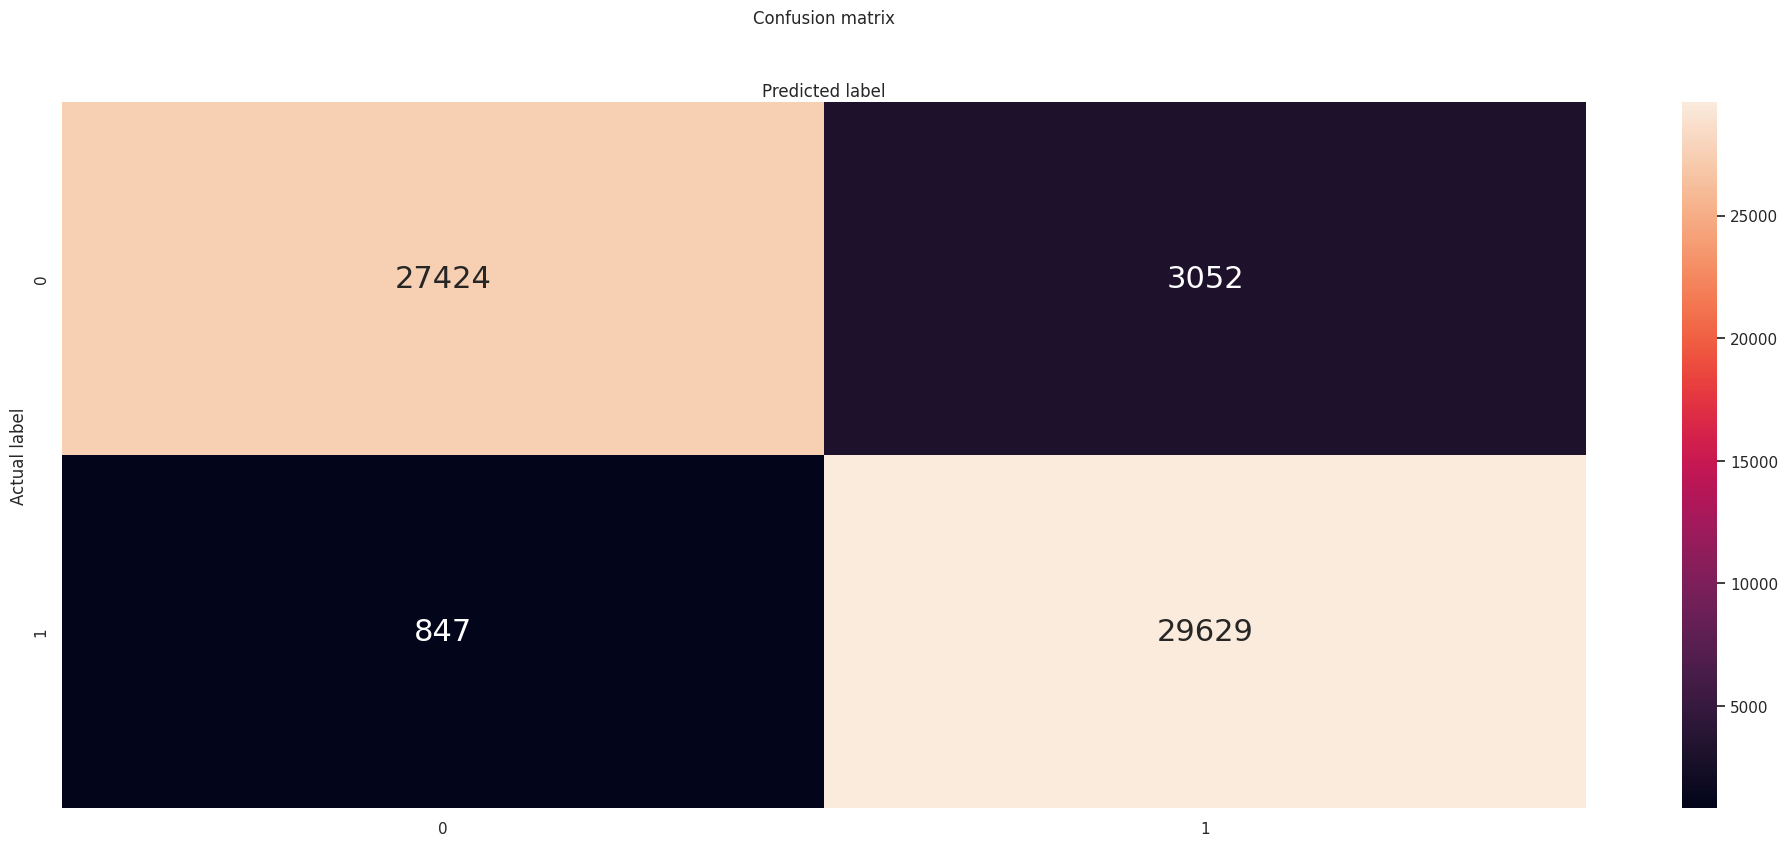

In [ ]:
class_names=[0,1]
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',loc="center" )

## 2. Logistic Regression
###Reference:

In [ ]:
logreg = LogisticRegression(random_state = 16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Model evaluation using Confusion Matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4199,  823],
       [1009, 4013]])

##Confusion Matrix Evaluation Metrics

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Not Heart Attack       0.81      0.84      0.82      5022
Had Heart Attack       0.83      0.80      0.81      5022

        accuracy                           0.82     10044
       macro avg       0.82      0.82      0.82     10044
    weighted avg       0.82      0.82      0.82     10044



##Visualizing Confusion Matrix using Heatmap

Text(0.5, 709.5555555555555, 'Predicted label')

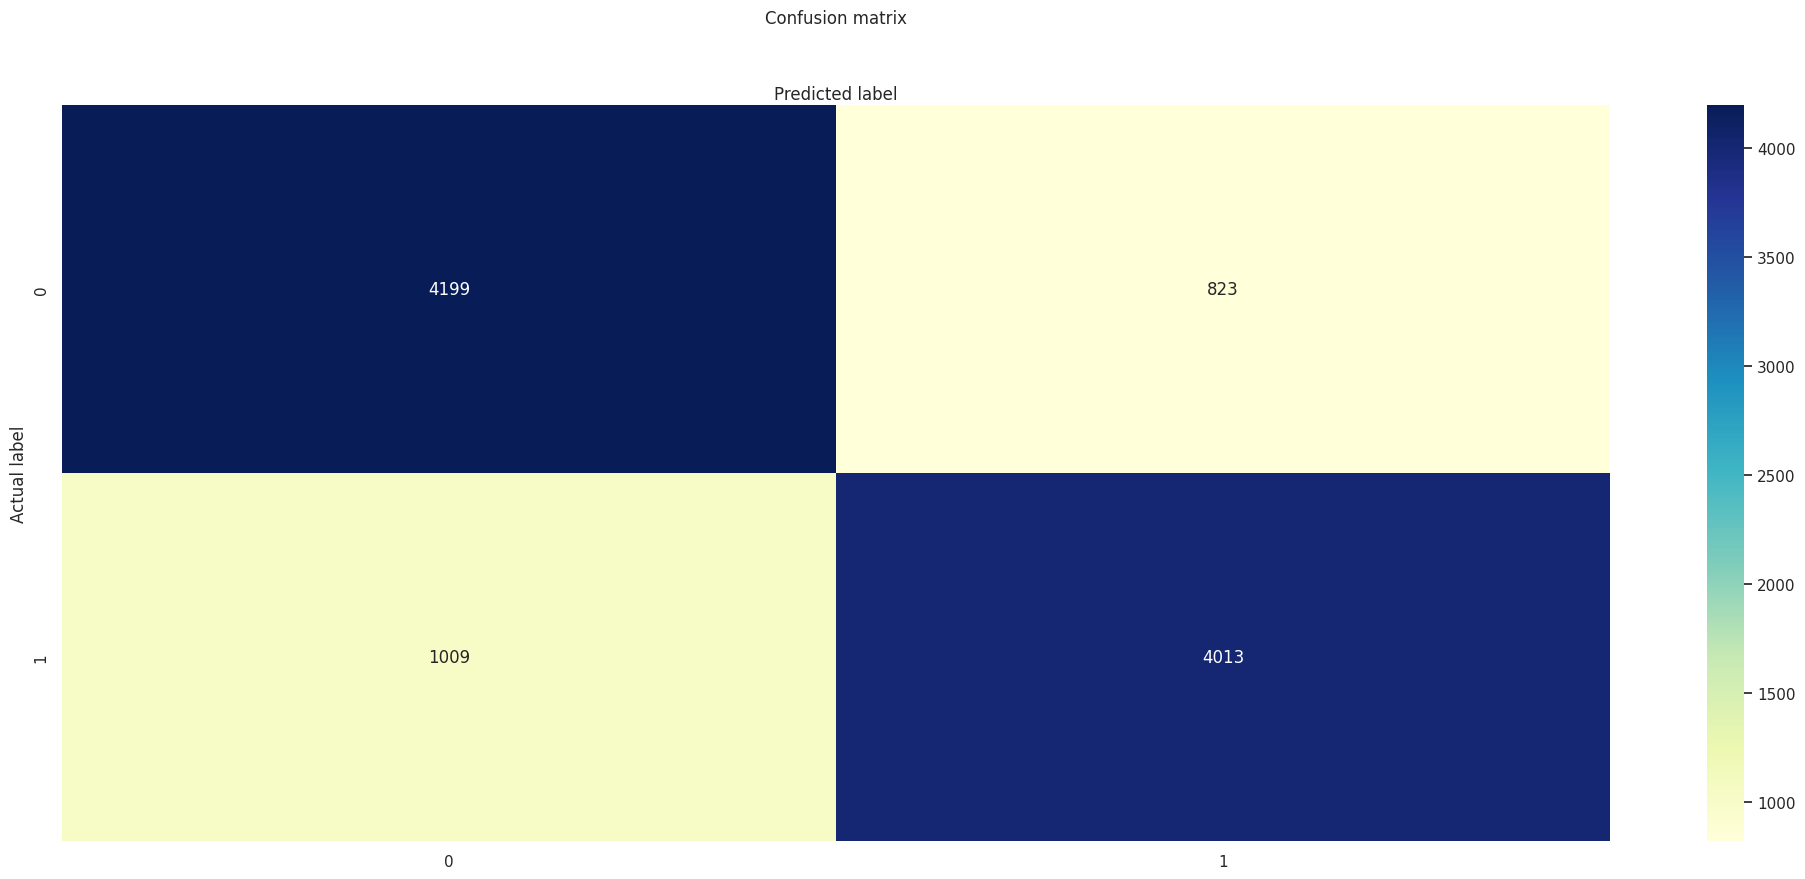

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 3. SVM

In [ ]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.35      0.49      5022
         1.0       0.58      0.92      0.71      5022

    accuracy                           0.63     10044
   macro avg       0.70      0.63      0.60     10044
weighted avg       0.70      0.63      0.60     10044



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time= 2.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min


KeyboardInterrupt: ignored